In [1]:
'''
need to set up env variable before running notebook

terminal command: export PYSYN_CDBS=/Users/angelachawla/Documents/research/pwv_noise_removal
or: point towards correct directory. var name mys be PYSYN_CDBS
'''

import numpy as np
from astropy.io import ascii
from pylab import *
from astropy.table import Table, vstack
import pandas as pd
from expecto import get_spectrum
from scipy.interpolate import RegularGridInterpolator as rgi
from scipy.stats import binned_statistic as bin
from itertools import product
%run Interpolate_final_v2.ipynb
%run GetSpectra_final_v2.ipynb
%run Binning_final_v2.ipynb
%run AddNoise_final_v2.ipynb
import batman

/opt/anaconda3/lib/python3.8/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /Users/angelachawla/Documents/research/pwv_noise_removal/Data/HST_data/grp/redcat/trds/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


In [2]:
water_array = [1.0, 1.5, 2.5, 3.5, 5.0]

'''
reads in .dat files. col1 is wavelength, col2 is transmission. Files are labeled with water content level in mm 
water content levels are listed in the array above. resolution is 200,000.
'''

d = {}
i=0
for n in water_array:
    water_content = str(water_array[i])
    d["data"+water_content] = ascii.read("../Data/transmission{0}_hi_res.dat".format(water_content))
    d["data"+water_content+"_pd"] = d["data"+water_content].to_pandas()
    #print(d["data"+water_content+"_pd"])
    i+=1

In [3]:
'''
for loop creates transmission values in shape necessary for interpolation function
'''
water_array = [1.0, 1.5, 2.5, 3.5, 5.0]

flux_array = []
i=0
for n in water_array:
    water_array_i = str(water_array[i])
    d["flux"+water_array_i] = np.array(d["data"+water_array_i+"_pd"]["col2"])
    flux_array.append(d["flux"+water_array_i])
    i+=1

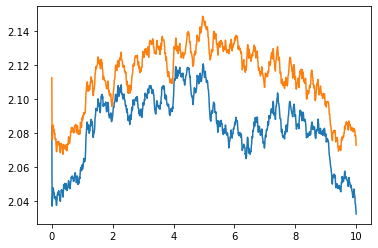

In [4]:
if __name__ == "__main__":

    timestamps = np.linspace(0,10,1000) #time in hours
    t, target_star_pwv, target_star_phase, target_star_mean = power_spectrum(12000, 1, 24000, timestamps, mean = 2)
    t1, comparison_star_pwv, _, _ = power_spectrum(12000, 1, 24000, timestamps, mean = target_star_mean, target = False, phase = target_star_phase, separation = 25)

    plt.plot(t, target_star_pwv)
    plt.plot(t, comparison_star_pwv)
    plt.show()


In [5]:
water_world_abs1 = ascii.read("../Data/water_world_abs1.dat")
water_world_abs2 = ascii.read("../Data/water_world_abs2.dat")
water_world_abs3 = ascii.read("../Data/water_world_abs3.dat")
water_world_abs4 = ascii.read("../Data/water_world_abs4.dat")

hot_jupiter_abs1 = ascii.read("../Data/hot_jupiter_abs1.dat")
hot_jupiter_abs2 = ascii.read("../Data/hot_jupiter_abs2.dat")
hot_jupiter_abs3 = ascii.read("../Data/hot_jupiter_abs3.dat")
hot_jupiter_abs4 = ascii.read("../Data/hot_jupiter_abs4.dat")

warm_jupiter_abs1 = ascii.read("../Data/warm_jupiter_abs1.dat")
warm_jupiter_abs2 = ascii.read("../Data/warm_jupiter_abs2.dat")
warm_jupiter_abs3 = ascii.read("../Data/warm_jupiter_abs3.dat")
warm_jupiter_abs4 = ascii.read("../Data/warm_jupiter_abs4.dat")

In [6]:
wave_range_abs1 = bin_array(.6, 1, 200)
wave_range_abs2 = bin_array(1, 1.25, 200)
wave_range_abs3 = bin_array(1.25, 1.56, 200)
wave_range_abs4 = bin_array(1.56, 2.1, 200)

In [7]:
params_hot_jupiter = batman.TransitParams()       #object to store transit parameters
params_hot_jupiter.t0 = 0.                        #time of inferior conjunction
params_hot_jupiter.per = 4.7361                       #orbital period 

# assume rp of .07 for now
params_hot_jupiter.rp = 0.04644                       #planet radi`us (in units of stellar radii)
#at each wavelength, add transit depth for atm. Will alter rp parameter
#change in atm depth in ppm
#Depth is rp^2 (because it's in units of solar radii)
#As such, rp is sqrt of depth



params_hot_jupiter.a = 4.98                        #semi-major axis (in units of stellar radii)
params_hot_jupiter.inc = 90                      #orbital inclination (in degrees)
params_hot_jupiter.ecc = 0.                       #eccentricity
params_hot_jupiter.w = 90.                        #longitude of periastron (in degrees)
params_hot_jupiter.limb_dark = "linear"        #limb darkening model
params_hot_jupiter.u = [0.5]      #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.5, 0.5, 1000)  #times at which to calculate light curve
model_hot_jupiter = batman.TransitModel(params_hot_jupiter, t)    #initializes model

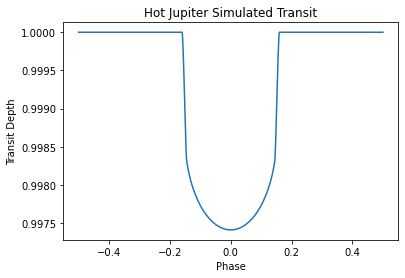

In [8]:

transit = model_hot_jupiter.light_curve(params_hot_jupiter)
plt.plot(t, transit)

plt.title("Hot Jupiter Simulated Transit")
plt.ylabel("Transit Depth")
plt.xlabel("Phase")

plt.savefig("transit.png")

In [9]:
params_warm_jupiter = batman.TransitParams()       #object to store transit parameters
params_warm_jupiter.t0 = 0.                        #time of inferior conjunction
params_warm_jupiter.per = 8.1587289                      #orbital period 

# assume rp of .07 for now
params_warm_jupiter.rp = 0.113                       #planet radi`us (in units of stellar radii)
#at each wavelength, add transit depth for atm. Will alter rp parameter
#change in atm depth in ppm
#Depth is rp^2 (because it's in units of solar radii)
#As such, rp is sqrt of depth



params_warm_jupiter.a = 18.2149                        #semi-major axis (in units of stellar radii)
params_warm_jupiter.inc = 88.55                      #orbital inclination (in degrees)
params_warm_jupiter.ecc = 0.                       #eccentricity
params_warm_jupiter.w = 90.                        #longitude of periastron (in degrees)
params_warm_jupiter.limb_dark = "nonlinear"        #limb darkening model
params_warm_jupiter.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.25, 0.25, 1000)  #times at which to calculate light curve
model_warm_jupiter = batman.TransitModel(params_warm_jupiter, t)    #initializes model

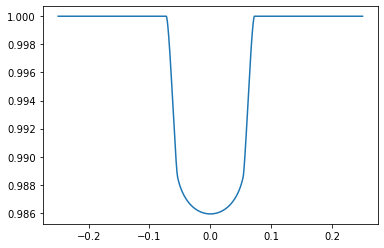

In [10]:

transit_warm_jupiter = model_warm_jupiter.light_curve(params_warm_jupiter)
plt.plot(t, transit_warm_jupiter)

In [11]:
params_water_world = batman.TransitParams()       #object to store transit parameters
params_water_world.t0 = 0.                        #time of inferior conjunction
params_water_world.per = 5.7214742                      #orbital period 

# assume rp of .07 for now
params_water_world.rp = 0.14434                       #planet radi`us (in units of stellar radii)
#at each wavelength, add transit depth for atm. Will alter rp parameter
#change in atm depth in ppm
#Depth is rp^2 (because it's in units of solar radii)
#As such, rp is sqrt of depth



params_water_world.a = 18.164                        #semi-major axis (in units of stellar radii)
params_water_world.inc = 89.56                      #orbital inclination (in degrees)
params_water_world.ecc = 0.                       #eccentricity
params_water_world.w = 90.                        #longitude of periastron (in degrees)
params_water_world.limb_dark = "nonlinear"        #limb darkening model
params_water_world.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.25, 0.25, 1000)  #times at which to calculate light curve
model_water_world = batman.TransitModel(params_water_world, t)    #initializes model

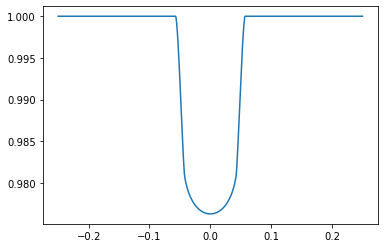

In [12]:
transit_water_world = model_water_world.light_curve(params_water_world)
plt.plot(t, transit_water_world)

In [13]:
#target_spec = spectrum(4000, 4)
#ref_spec = spectrum(4500, 4)

'''
guesses on timeout error: firewall?
wifi (might be faster at the college)

could save files locally, but since they are large might be better to try and troubleshoot this

'''

'\nguesses on timeout error: firewall?\nwifi (might be faster at the college)\n\ncould save files locally, but since they are large might be better to try and troubleshoot this\n\n'

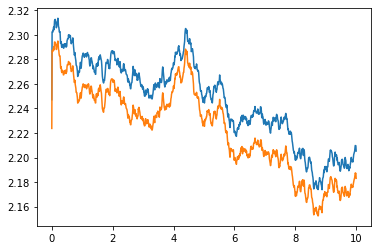

In [14]:
if __name__ == "__main__":

    timestamps = np.linspace(0,10,1000) #time in hours
    t, target_star_pwv, target_star_phase, target_star_mean = power_spectrum(12000, 1, 24000, timestamps, mean = 2)
    t1, comparison_star_pwv, _, _ = power_spectrum(12000, 1, 24000, timestamps, mean = target_star_mean, target = False, phase = target_star_phase, separation = 10)

    plt.plot(t, target_star_pwv)
    plt.plot(t, comparison_star_pwv)
    plt.show()


In [15]:
#10**-3.5

In [ ]:
target_spec = np.load("../Data/")

In [58]:
params_hot_jupiter.rp = 0.04644  
divided_hot_jupiter_abs1 = bin_divide(target_spec, ref_spec, target_star_pwv, comparison_star_pwv, .6, 1, hot_jupiter_abs1, params_hot_jupiter)
#params_hot_jupiter.rp = 0.04644
#divided_hot_jupiter_abs2 = bin_divide(target_spec, ref_spec, target_star_pwv, comparison_star_pwv, 1, 1.25, hot_jupiter_abs2, params_hot_jupiter)
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs3 = bin_divide(target_spec, ref_spec, target_star_pwv, comparison_star_pwv, 1.25, 1.56, hot_jupiter_abs3, params_hot_jupiter)
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs4 = bin_divide(target_spec, ref_spec, target_star_pwv, comparison_star_pwv, 1.56, 2.1, hot_jupiter_abs4, params_hot_jupiter)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644
bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644
bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644


'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

In [45]:
#np.where(target_spec[0] == 16002)

In [ ]:
#10**-3.5

In [72]:
normalized_hot_jupiter_abs1 = normalize(divided_hot_jupiter_abs1)
#normalized_hot_jupiter_abs2 = normalize(divided_hot_jupiter_abs2)
normalized_hot_jupiter_abs3 = normalize(divided_hot_jupiter_abs3)
normalized_hot_jupiter_abs4 = normalize(divided_hot_jupiter_abs4)

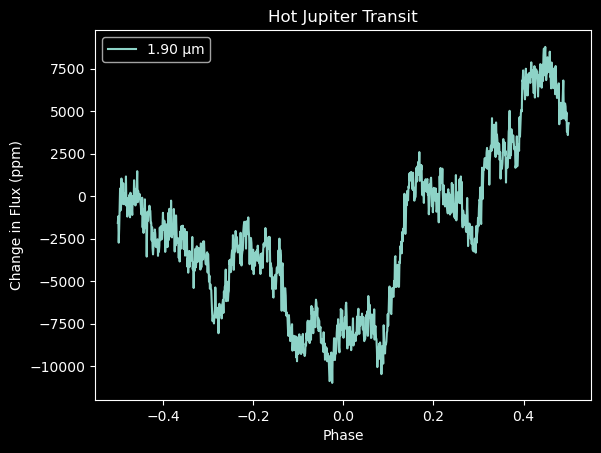

In [269]:
t = np.linspace(-0.5, 0.5, 1000)

plt.style.use('dark_background')

#plt.plot(t, normalized_hot_jupiter_abs4[40]*10**6, label="1.90 μm", color='#1f77b4')
plt.plot(t, normalized_hot_jupiter_abs4[40]*10**6, label="1.90 μm")
#plt.plot(t, normalized_hot_jupiter_abs1[87]*10**6, label=".93 μm", color="orange")

plt.title("Hot Jupiter Transit")
plt.xlabel("Phase")
plt.ylabel("Change in Flux (ppm)")

plt.legend()

#plt.savefig("1.9and.93microns.png")
plt.savefig("1.9microns.png")

In [118]:
wave_range_abs3[28]

1.4373407624753665

In [ ]:
len(normalized_hot_jupiter_abs1)

In [ ]:
plt.plot(normalized_hot_jupiter_abs2[0]+1, label=str(wave_range_abs2[0]))
print(np.std(normalized_hot_jupiter_abs2[0][0:300]))
plt.plot(normalized_hot_jupiter_abs2[10]+1, label=str(wave_range_abs2[10]))
plt.plot(normalized_hot_jupiter_abs2[20]+1, label=str(wave_range_abs2[20]))
plt.plot(normalized_hot_jupiter_abs2[30]+1, label=str(wave_range_abs2[30]))
plt.plot(normalized_hot_jupiter_abs2[40]+1, label=str(wave_range_abs2[40]))

plt.legend()

In [61]:
#target_spec_stellar_temp = spectrum(4000, 4)
ref_spec_stellar_temp = spectrum(8000, 4)

In [62]:
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs3_hotref = bin_divide(target_spec, ref_spec_stellar_temp, target_star_pwv, comparison_star_pwv, 1.25, 1.56, hot_jupiter_abs3, params_hot_jupiter)

bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644


In [63]:
len(divided_hot_jupiter_abs3_hotref)

44

In [64]:
hotref = normalize(divided_hot_jupiter_abs3_hotref)

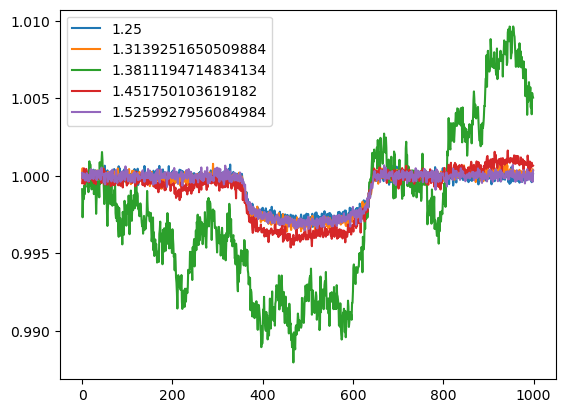

In [69]:
plt.plot(hotref[0]+1, label=str(wave_range_abs3[0]))
plt.plot(hotref[10]+1, label=str(wave_range_abs3[10]))
plt.plot(hotref[20]+1, label=str(wave_range_abs3[20]))
plt.plot(hotref[30]+1, label=str(wave_range_abs3[30]))
plt.plot(hotref[40]+1, label=str(wave_range_abs3[40]))
#plt.plot(hotref[45]+1, label=str(wave_range_abs4[45]))
#plt.plot(normalized_hot_jupiter_abs4[50]+1, label=str(wave_range_abs4[50]))
#plt.plot(normalized_hot_jupiter_abs4[60]+1, label=str(wave_range_abs4[60]))

plt.legend()

In [66]:
cold_ref = normalize(divided_hot_jupiter_abs3)

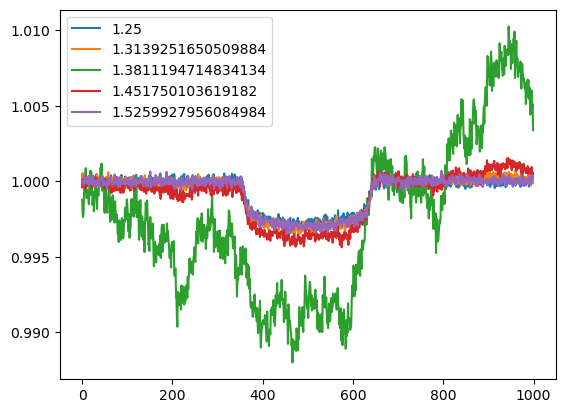

In [68]:
plt.plot(cold_ref[0]+1, label=str(wave_range_abs3[0]))
plt.plot(cold_ref[10]+1, label=str(wave_range_abs3[10]))
plt.plot(cold_ref[20]+1, label=str(wave_range_abs3[20]))
plt.plot(cold_ref[30]+1, label=str(wave_range_abs3[30]))
plt.plot(cold_ref[40]+1, label=str(wave_range_abs3[40]))
#plt.plot(hotref[45]+1, label=str(wave_range_abs4[45]))
#plt.plot(normalized_hot_jupiter_abs4[50]+1, label=str(wave_range_abs4[50]))
#plt.plot(normalized_hot_jupiter_abs4[60]+1, label=str(wave_range_abs4[60]))

plt.legend()

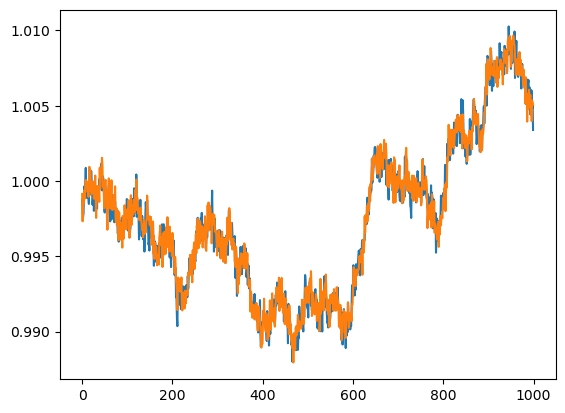

In [140]:
#plt.plot(cold_ref[30]+1, label=str(wave_range_abs3[30]))
#plt.plot(hotref[30]+1, label=str(wave_range_abs3[30]))

plt.plot(cold_ref[20]+1, label=str(wave_range_abs3[30]))
plt.plot(hotref[20]+1, label=str(wave_range_abs3[30]))

In [ ]:
plt.plot(normalized_hot_jupiter_abs4[0]+1, label=str(wave_range_abs4[0]))
plt.plot(normalized_hot_jupiter_abs4[10]+1, label=str(wave_range_abs4[10]))
plt.plot(normalized_hot_jupiter_abs4[20]+1, label=str(wave_range_abs4[20]))
plt.plot(normalized_hot_jupiter_abs4[30]+1, label=str(wave_range_abs4[30]))
plt.plot(normalized_hot_jupiter_abs4[40]+1, label=str(wave_range_abs4[40]))
plt.plot(normalized_hot_jupiter_abs4[45]+1, label=str(wave_range_abs4[45]))
plt.plot(normalized_hot_jupiter_abs4[50]+1, label=str(wave_range_abs4[50]))
#plt.plot(normalized_hot_jupiter_abs4[60]+1, label=str(wave_range_abs4[60]))

plt.legend()

In [ ]:
plt.plot(normalized_hot_jupiter_abs1[0]+1, label=str(wave_range_abs1[0]))
plt.plot(transit)

In [ ]:
%run Model.ipynb

#time = arange(1, 1001, 1)
times = np.linspace(-0.5, 0.5, 1000)

#flux = normalized_hot_jupiter_abs1[0]
#transit

hotjupiter_81microns = normalized_hot_jupiter_abs1[60]+1
hotjupiter_99microns = normalized_hot_jupiter_abs1[100]+1

In [ ]:
transit_depth, std_dev_transit_depth, df = fit_lightcurve(times, hotjupiter_81microns)


In [ ]:
#transit depth fit, hot jupiter at .81 microns
print(transit_depth)
print(std_dev_transit_depth)

corner(df[['rp_rs2', 'loge']], labels = ['Rp_Rs2', 'Log_error']) # show corner plot
plt.show()

In [ ]:
#"len(time)
10**-3.5

In [ ]:
hotjupiter1microns = normalized_hot_jupiter_abs2[0]+1
#transit_depth, std_dev_transit_depth, df = fit_lightcurve(times, hotjupiter1microns)


In [ ]:
#transit depth fit, hot jupiter at 1 microns
print(transit_depth)
print(std_dev_transit_depth)

corner(df[['rp_rs2', 'loge']], labels = ['Rp_Rs2', 'Log_error']) # show corner plot
plt.show()

In [ ]:
#transit_depth, std_dev_transit_depth, df = fit_lightcurve(times, hotjupiter_99microns)

In [ ]:
#transit depth fit, hot jupiter at .99 microns
print(transit_depth)
print(std_dev_transit_depth)

corner(df[['rp_rs2', 'loge']], labels = ['Rp_Rs2', 'Log_error']) # show corner plot
plt.show()

In [ ]:
hotjupiter1_1microns = normalized_hot_jupiter_abs2[20]+1
hotjupiter1_16microns = normalized_hot_jupiter_abs2[30]+1

In [ ]:
#transit_depth, std_dev_transit_depth, df = fit_lightcurve(times, hotjupiter1_1microns)

In [ ]:
#transit depth at 1.105 microns, hot jupiter
print(transit_depth)
print(std_dev_transit_depth)

corner(df[['rp_rs2', 'loge']], labels = ['Rp_Rs2', 'Log_error']) # show corner plot
plt.show()

In [ ]:
#transit_depth, std_dev_transit_depth, df = fit_lightcurve(times, hotjupiter1_16microns)

In [ ]:
#transit depth at 1.16 microns, hot jupiter
print(transit_depth)
print(std_dev_transit_depth)

corner(df[['rp_rs2', 'loge']], labels = ['Rp_Rs2', 'Log_error']) # show corner plot
plt.show()

In [ ]:
plt.plot(normalized_hot_jupiter_abs3[0]+1, label=str(wave_range_abs3[0]))
plt.plot(normalized_hot_jupiter_abs3[10]+1, label=str(wave_range_abs3[10]))
#plt.plot(normalized_hot_jupiter_abs3[20]+1, label=str(wave_range_abs3[20]))
plt.plot(normalized_hot_jupiter_abs3[25]+1, label=str(wave_range_abs3[20]))
plt.plot(normalized_hot_jupiter_abs3[30]+1, label=str(wave_range_abs3[30]))
#plt.plot(normalized_hot_jupiter_abs3[40]+1, label=str(wave_range_abs3[40]))

plt.legend()

In [ ]:
hotjupiter1_25microns = normalized_hot_jupiter_abs3[0]+1
hotjupiter1_31microns = normalized_hot_jupiter_abs3[10]+1
hotjupiter1_38microns = normalized_hot_jupiter_abs3[20]+1
hotjupiter1_45microns = normalized_hot_jupiter_abs3[30]+1

In [ ]:
transit_depth_hot_jupiter1_25, std_dev_transit_depth_jupiter1_25, df_jupiter1_25 = fit_lightcurve(times, hotjupiter1_25microns)
transit_depth_hot_jupiter1_31, std_dev_transit_depth_jupiter1_31, df_jupiter1_31 = fit_lightcurve(times, hotjupiter1_31microns)
transit_depth_hot_jupiter1_38, std_dev_transit_depth_jupiter1_38, df_jupiter1_38 = fit_lightcurve(times, hotjupiter1_38microns)
transit_depth_hot_jupiter1_45, std_dev_transit_depth_jupiter1_45, df_jupiter1_45 = fit_lightcurve(times, hotjupiter1_45microns)

In [ ]:

print(transit_depth_hot_jupiter1_25)
print(std_dev_transit_depth_jupiter1_25)

corner(df_jupiter1_25[['rp_rs2', 'loge']], labels = ['Rp_Rs2', 'Log_error']) # show corner plot
plt.show()

In [ ]:
#transit depth at 1.16 microns, hot jupiter
print(transit_depth_hot_jupiter1_31)
print(std_dev_transit_depth_jupiter1_31)

corner(df_jupiter1_31[['rp_rs2', 'loge']], labels = ['Rp_Rs2', 'Log_error']) # show corner plot
plt.show()

In [ ]:
#transit depth at 1.16 microns, hot jupiter
print(transit_depth_hot_jupiter1_38)
print(std_dev_transit_depth_jupiter1_38)

corner(df_jupiter1_38[['rp_rs2', 'loge']], labels = ['Rp_Rs2', 'Log_error']) # show corner plot
plt.show()

In [ ]:
#transit depth at 1.16 microns, hot jupiter
print(transit_depth_hot_jupiter1_45)
print(std_dev_transit_depth_jupiter1_45)

corner(df_jupiter1_45[['rp_rs2', 'loge']], labels = ['Rp_Rs2', 'Log_error']) # show corner plot
plt.show()

In [ ]:
ref_spec

In [20]:
np.max(ref_spec[1])

0.10587739916216676

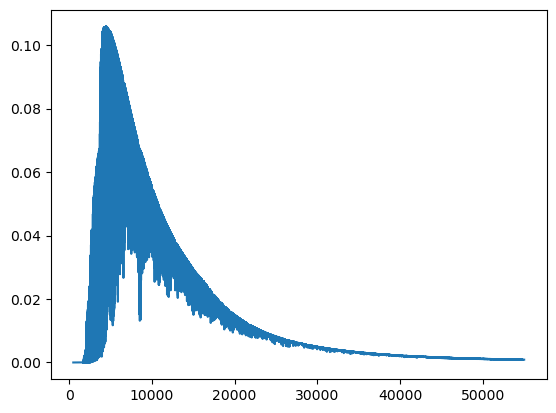

In [21]:
plt.plot(ref_spec[0], ref_spec[1])

In [33]:
flux_array_photon = np.array([0.10587739916216676, 0.10587739916216676])

photon_noise(flux_array_photon, 80)

noise std dev max: 0.0009138442446781583


array([1.00154023, 1.00013886])

In [ ]:
ref_spec_test = spectrum(4000, 10)

In [ ]:
ref_spec_test

In [ ]:
#high_noise = np.random.normal(100, 1, 1000)
#low_noise = np.random.normal(.1, .001, 1000)

In [ ]:
many_photons = np.ones(1000)*100
few_photons = np.ones(1000)

In [ ]:
high_photon_noise = photon_noise(few_photons, 180)
low_photon_noise = photon_noise(many_photons, 180)

In [ ]:
plt.plot((high_photon_noise-1)*10**6, label="flux = 1", color="mediumblue")
plt.plot((low_photon_noise-1)*10**6, label="flux = 100", color="darkorange")

plt.title("Simulated Photon Noise")
plt.ylabel("Change in Flux (ppm)")

plt.legend(loc="lower right")

#plt.savefig("lowphoton_noise.png")
plt.savefig("highphoton_noise.png")

In [ ]:
divided_hot_jupiter_abs1 = bin_divide(target_spec, ref_spec, target_star_pwv, comparison_star_pwv, .6, 1, hot_jupiter_abs1, params_hot_jupiter)

In [ ]:
if __name__ == "__main__":

    timestamps = np.linspace(0,10,1000) #time in hours
    t, target_star_pwv, target_star_phase, target_star_mean = power_spectrum(12000, 1, 24000, timestamps, mean = 2)
    t1, comparison_star_pwv, _, _ = power_spectrum(12000, 1, 24000, timestamps, mean = target_star_mean, target = False, phase = target_star_phase, separation = 15)

    plt.plot(t, target_star_pwv)
    plt.plot(t, comparison_star_pwv)
    plt.show()


In [127]:
target_spec = spectrum(4000, 7)
ref_spec_3000 = spectrum(3000, 7)
ref_spec_4000 = spectrum(4000, 7)
ref_spec_5000 = spectrum(5000, 7)
ref_spec_6000 = spectrum(6000, 7)
ref_spec_7000 = spectrum(7000, 7)
ref_spec_8000 = spectrum(8000, 7)

In [ ]:
if __name__ == "__main__":

    timestamps = np.linspace(0,10,1000) #time in hours
    t, target_star_pwv, target_star_phase, target_star_mean = power_spectrum(12000, 1, 24000, timestamps, mean = 2)
    t1, comparison_star_pwv, _, _ = power_spectrum(12000, 1, 24000, timestamps, mean = target_star_mean, target = False, phase = target_star_phase, separation = 0)

    plt.plot(t, target_star_pwv)
    plt.plot(t, comparison_star_pwv)
    plt.show()


In [ ]:
same_pwv_abs3_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, hot_jupiter_abs3, params_hot_jupiter)

In [ ]:
same_pwv_abs3_8000 = bin_divide(target_spec, ref_spec_8000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, hot_jupiter_abs3, params_hot_jupiter)

In [133]:
params_hot_jupiter.rp = 0.04644  
divided_hot_jupiter_abs1_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, .6, 1, hot_jupiter_abs1, params_hot_jupiter)
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs2_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, 1, 1.25, hot_jupiter_abs2, params_hot_jupiter)
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs3_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, hot_jupiter_abs3, params_hot_jupiter)
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs4_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, hot_jupiter_abs4, params_hot_jupiter)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644
bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644
bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644
bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644


'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

In [134]:
params_hot_jupiter.rp = 0.04644  
divided_hot_jupiter_abs1_4000 = bin_divide(target_spec, ref_spec_4000, target_star_pwv, comparison_star_pwv, .6, 1, hot_jupiter_abs1, params_hot_jupiter)
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs2_4000 = bin_divide(target_spec, ref_spec_4000, target_star_pwv, comparison_star_pwv, 1, 1.25, hot_jupiter_abs2, params_hot_jupiter)
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs3_4000 = bin_divide(target_spec, ref_spec_4000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, hot_jupiter_abs3, params_hot_jupiter)
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs4_4000 = bin_divide(target_spec, ref_spec_4000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, hot_jupiter_abs4, params_hot_jupiter)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644
bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644
bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644
bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644


'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

In [135]:
params_hot_jupiter.rp = 0.04644  
divided_hot_jupiter_abs1_5000 = bin_divide(target_spec, ref_spec_5000, target_star_pwv, comparison_star_pwv, .6, 1, hot_jupiter_abs1, params_hot_jupiter)
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs2_5000 = bin_divide(target_spec, ref_spec_5000, target_star_pwv, comparison_star_pwv, 1, 1.25, hot_jupiter_abs2, params_hot_jupiter)
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs3_5000 = bin_divide(target_spec, ref_spec_5000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, hot_jupiter_abs3, params_hot_jupiter)
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs4_5000 = bin_divide(target_spec, ref_spec_5000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, hot_jupiter_abs4, params_hot_jupiter)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644
bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644
bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644
bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644


'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

In [136]:
params_hot_jupiter.rp = 0.04644  
divided_hot_jupiter_abs1_6000 = bin_divide(target_spec, ref_spec_6000, target_star_pwv, comparison_star_pwv, .6, 1, hot_jupiter_abs1, params_hot_jupiter)
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs2_6000 = bin_divide(target_spec, ref_spec_6000, target_star_pwv, comparison_star_pwv, 1, 1.25, hot_jupiter_abs2, params_hot_jupiter)
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs3_6000 = bin_divide(target_spec, ref_spec_6000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, hot_jupiter_abs3, params_hot_jupiter)
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs4_6000 = bin_divide(target_spec, ref_spec_6000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, hot_jupiter_abs4, params_hot_jupiter)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644
bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644
bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644
bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644


'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

In [141]:
params_hot_jupiter.rp = 0.04644  
divided_hot_jupiter_abs1_7000 = bin_divide(target_spec, ref_spec_7000, target_star_pwv, comparison_star_pwv, .6, 1, hot_jupiter_abs1, params_hot_jupiter)
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs2_7000 = bin_divide(target_spec, ref_spec_7000, target_star_pwv, comparison_star_pwv, 1, 1.25, hot_jupiter_abs2, params_hot_jupiter)
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs3_7000 = bin_divide(target_spec, ref_spec_7000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, hot_jupiter_abs3, params_hot_jupiter)
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs4_7000 = bin_divide(target_spec, ref_spec_7000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, hot_jupiter_abs4, params_hot_jupiter)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644
bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644
bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644
bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644


'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

In [138]:
params_hot_jupiter.rp = 0.04644  
divided_hot_jupiter_abs1_8000 = bin_divide(target_spec, ref_spec_8000, target_star_pwv, comparison_star_pwv, .6, 1, hot_jupiter_abs1, params_hot_jupiter)
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs2_8000 = bin_divide(target_spec, ref_spec_8000, target_star_pwv, comparison_star_pwv, 1, 1.25, hot_jupiter_abs2, params_hot_jupiter)
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs3_8000 = bin_divide(target_spec, ref_spec_8000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, hot_jupiter_abs3, params_hot_jupiter)
params_hot_jupiter.rp = 0.04644
divided_hot_jupiter_abs4_8000 = bin_divide(target_spec, ref_spec_8000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, hot_jupiter_abs4, params_hot_jupiter)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644
bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644
bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644
bulk_transit_depth: 0.0021566736
bulk_rp: 0.04644


'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

In [238]:
2157+538

2695

In [ ]:
hot_jupiter_abs1_3000 = normalize(divided_hot_jupiter_abs1_3000)
hot_jupiter_abs2_3000 = normalize(divided_hot_jupiter_abs2_3000)
hot_jupiter_abs3_3000 = normalize(divided_hot_jupiter_abs3_3000)
hot_jupiter_abs4_3000 = normalize(divided_hot_jupiter_abs4_3000)

hot_jupiter_abs1_4000 = normalize(divided_hot_jupiter_abs1_4000)
hot_jupiter_abs2_4000 = normalize(divided_hot_jupiter_abs2_4000)
hot_jupiter_abs3_4000 = normalize(divided_hot_jupiter_abs3_4000)
hot_jupiter_abs4_4000 = normalize(divided_hot_jupiter_abs4_4000)

hot_jupiter_abs1_5000 = normalize(divided_hot_jupiter_abs1_5000)
hot_jupiter_abs2_5000 = normalize(divided_hot_jupiter_abs2_5000)
hot_jupiter_abs3_5000 = normalize(divided_hot_jupiter_abs3_5000)
hot_jupiter_abs4_5000 = normalize(divided_hot_jupiter_abs4_5000)

hot_jupiter_abs1_6000 = normalize(divided_hot_jupiter_abs1_6000)
hot_jupiter_abs2_6000 = normalize(divided_hot_jupiter_abs2_6000)
hot_jupiter_abs3_6000 = normalize(divided_hot_jupiter_abs3_6000)
hot_jupiter_abs4_6000 = normalize(divided_hot_jupiter_abs4_6000)

hot_jupiter_abs1_7000 = normalize(divided_hot_jupiter_abs1_7000)
hot_jupiter_abs2_7000 = normalize(divided_hot_jupiter_abs2_7000)
hot_jupiter_abs3_7000 = normalize(divided_hot_jupiter_abs3_7000)
hot_jupiter_abs4_7000 = normalize(divided_hot_jupiter_abs4_7000)

hot_jupiter_abs1_8000 = normalize(divided_hot_jupiter_abs1_8000)
hot_jupiter_abs2_8000 = normalize(divided_hot_jupiter_abs2_8000)
hot_jupiter_abs3_8000 = normalize(divided_hot_jupiter_abs3_8000)
hot_jupiter_abs4_8000 = normalize(divided_hot_jupiter_abs4_8000)



In [142]:
params_water_world = batman.TransitParams()       #object to store transit parameters
params_water_world.t0 = 0.                        #time of inferior conjunction
params_water_world.per = 5.7214742                      #orbital period 

# assume rp of .07 for now
params_water_world.rp = 0.14434                       #planet radi`us (in units of stellar radii)
#at each wavelength, add transit depth for atm. Will alter rp parameter
#change in atm depth in ppm
#Depth is rp^2 (because it's in units of solar radii)
#As such, rp is sqrt of depth



params_water_world.a = 18.164                        #semi-major axis (in units of stellar radii)
params_water_world.inc = 89.56                      #orbital inclination (in degrees)
params_water_world.ecc = 0.                       #eccentricity
params_water_world.w = 90.                        #longitude of periastron (in degrees)
params_water_world.limb_dark = "nonlinear"        #limb darkening model
params_water_world.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.25, 0.25, 1000)  #times at which to calculate light curve
model_water_world = batman.TransitModel(params_water_world, t)    #initializes model

In [143]:
params_water_world.rp = 0.14434  
divided_water_world_abs1_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, .6, 1, water_world_abs1, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs2_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, 1, 1.25, water_world_abs2, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs3_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, water_world_abs3, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs4_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, water_world_abs4, params_water_world)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434


'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

In [144]:
params_water_world.rp = 0.14434  
divided_water_world_abs1_4000 = bin_divide(target_spec, ref_spec_4000, target_star_pwv, comparison_star_pwv, .6, 1, water_world_abs1, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs2_4000 = bin_divide(target_spec, ref_spec_4000, target_star_pwv, comparison_star_pwv, 1, 1.25, water_world_abs2, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs3_4000 = bin_divide(target_spec, ref_spec_4000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, water_world_abs3, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs4_4000 = bin_divide(target_spec, ref_spec_4000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, water_world_abs4, params_water_world)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434


'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

In [145]:
params_water_world.rp = 0.14434  
divided_water_world_abs1_5000 = bin_divide(target_spec, ref_spec_5000, target_star_pwv, comparison_star_pwv, .6, 1, water_world_abs1, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs2_5000 = bin_divide(target_spec, ref_spec_5000, target_star_pwv, comparison_star_pwv, 1, 1.25, water_world_abs2, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs3_5000 = bin_divide(target_spec, ref_spec_5000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, water_world_abs3, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs4_5000 = bin_divide(target_spec, ref_spec_5000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, water_world_abs4, params_water_world)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434


'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

In [146]:
params_water_world.rp = 0.14434  
divided_water_world_abs1_6000 = bin_divide(target_spec, ref_spec_6000, target_star_pwv, comparison_star_pwv, .6, 1, water_world_abs1, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs2_6000 = bin_divide(target_spec, ref_spec_6000, target_star_pwv, comparison_star_pwv, 1, 1.25, water_world_abs2, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs3_6000 = bin_divide(target_spec, ref_spec_6000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, water_world_abs3, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs4_6000 = bin_divide(target_spec, ref_spec_6000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, water_world_abs4, params_water_world)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434


'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

In [147]:
params_water_world.rp = 0.14434  
divided_water_world_abs1_7000 = bin_divide(target_spec, ref_spec_7000, target_star_pwv, comparison_star_pwv, .6, 1, water_world_abs1, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs2_7000 = bin_divide(target_spec, ref_spec_7000, target_star_pwv, comparison_star_pwv, 1, 1.25, water_world_abs2, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs3_7000 = bin_divide(target_spec, ref_spec_7000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, water_world_abs3, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs4_7000 = bin_divide(target_spec, ref_spec_7000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, water_world_abs4, params_water_world)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434


'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

In [148]:
params_water_world.rp = 0.14434  
divided_water_world_abs1_8000 = bin_divide(target_spec, ref_spec_8000, target_star_pwv, comparison_star_pwv, .6, 1, water_world_abs1, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs2_8000 = bin_divide(target_spec, ref_spec_8000, target_star_pwv, comparison_star_pwv, 1, 1.25, water_world_abs2, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs3_8000 = bin_divide(target_spec, ref_spec_8000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, water_world_abs3, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs4_8000 = bin_divide(target_spec, ref_spec_8000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, water_world_abs4, params_water_world)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434


'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

In [149]:
params_warm_jupiter.rp = 0.14434  
divided_warm_jupiter_abs1_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, .6, 1, warm_jupiter_abs1, params_warm_jupiter)
params_warm_jupiter.rp = 0.14434 
divided_warm_jupiter_abs2_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, 1, 1.25, warm_jupiter_abs2, params_warm_jupiter)
params_warm_jupiter.rp = 0.14434 
divided_warm_jupiter_abs3_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, warm_jupiter_abs3, params_warm_jupiter)
params_warm_jupiter.rp = 0.14434 
divided_warm_jupiter_abs4_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, warm_jupiter_abs4, params_warm_jupiter)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434


'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

In [150]:
params_warm_jupiter.rp = 0.14434  
divided_warm_jupiter_abs1_4000 = bin_divide(target_spec, ref_spec_4000, target_star_pwv, comparison_star_pwv, .6, 1, warm_jupiter_abs1, params_warm_jupiter)
params_warm_jupiter.rp = 0.14434 
divided_warm_jupiter_abs2_4000 = bin_divide(target_spec, ref_spec_4000, target_star_pwv, comparison_star_pwv, 1, 1.25, warm_jupiter_abs2, params_warm_jupiter)
params_warm_jupiter.rp = 0.14434 
divided_warm_jupiter_abs3_4000 = bin_divide(target_spec, ref_spec_4000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, warm_jupiter_abs3, params_warm_jupiter)
params_warm_jupiter.rp = 0.14434 
divided_warm_jupiter_abs4_4000 = bin_divide(target_spec, ref_spec_4000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, warm_jupiter_abs4, params_warm_jupiter)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434


'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

In [151]:
params_warm_jupiter.rp = 0.14434  
divided_warm_jupiter_abs1_5000 = bin_divide(target_spec, ref_spec_5000, target_star_pwv, comparison_star_pwv, .6, 1, warm_jupiter_abs1, params_warm_jupiter)
params_warm_jupiter.rp = 0.14434 
divided_warm_jupiter_abs2_5000 = bin_divide(target_spec, ref_spec_5000, target_star_pwv, comparison_star_pwv, 1, 1.25, warm_jupiter_abs2, params_warm_jupiter)
params_warm_jupiter.rp = 0.14434 
divided_warm_jupiter_abs3_5000 = bin_divide(target_spec, ref_spec_5000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, warm_jupiter_abs3, params_warm_jupiter)
params_warm_jupiter.rp = 0.14434 
divided_warm_jupiter_abs4_5000 = bin_divide(target_spec, ref_spec_5000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, warm_jupiter_abs4, params_warm_jupiter)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434


'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

In [152]:
params_warm_jupiter.rp = 0.14434  
divided_warm_jupiter_abs1_6000 = bin_divide(target_spec, ref_spec_6000, target_star_pwv, comparison_star_pwv, .6, 1, warm_jupiter_abs1, params_warm_jupiter)
params_warm_jupiter.rp = 0.14434 
divided_warm_jupiter_abs2_6000 = bin_divide(target_spec, ref_spec_6000, target_star_pwv, comparison_star_pwv, 1, 1.25, warm_jupiter_abs2, params_warm_jupiter)
params_warm_jupiter.rp = 0.14434 
divided_warm_jupiter_abs3_6000 = bin_divide(target_spec, ref_spec_6000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, warm_jupiter_abs3, params_warm_jupiter)
params_warm_jupiter.rp = 0.14434 
divided_warm_jupiter_abs4_6000 = bin_divide(target_spec, ref_spec_6000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, warm_jupiter_abs4, params_warm_jupiter)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434


'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

In [153]:
params_warm_jupiter.rp = 0.14434  
divided_warm_jupiter_abs1_7000 = bin_divide(target_spec, ref_spec_7000, target_star_pwv, comparison_star_pwv, .6, 1, warm_jupiter_abs1, params_warm_jupiter)
params_warm_jupiter.rp = 0.14434 
divided_warm_jupiter_abs2_7000 = bin_divide(target_spec, ref_spec_7000, target_star_pwv, comparison_star_pwv, 1, 1.25, warm_jupiter_abs2, params_warm_jupiter)
params_warm_jupiter.rp = 0.14434 
divided_warm_jupiter_abs3_7000 = bin_divide(target_spec, ref_spec_7000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, warm_jupiter_abs3, params_warm_jupiter)
params_warm_jupiter.rp = 0.14434 
divided_warm_jupiter_abs4_7000 = bin_divide(target_spec, ref_spec_7000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, warm_jupiter_abs4, params_warm_jupiter)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434


'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

In [154]:
params_warm_jupiter.rp = 0.14434  
divided_warm_jupiter_abs1_8000 = bin_divide(target_spec, ref_spec_8000, target_star_pwv, comparison_star_pwv, .6, 1, warm_jupiter_abs1, params_warm_jupiter)
params_warm_jupiter.rp = 0.14434 
divided_warm_jupiter_abs2_8000 = bin_divide(target_spec, ref_spec_8000, target_star_pwv, comparison_star_pwv, 1, 1.25, warm_jupiter_abs2, params_warm_jupiter)
params_warm_jupiter.rp = 0.14434
divided_warm_jupiter_abs3_8000 = bin_divide(target_spec, ref_spec_8000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, warm_jupiter_abs3, params_warm_jupiter)
params_warm_jupiter.rp = 0.14434 
divided_warm_jupiter_abs4_8000 = bin_divide(target_spec, ref_spec_8000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, warm_jupiter_abs4, params_warm_jupiter)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434


'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

In [155]:
hot_jupiter_abs1_3000 = normalize(divided_hot_jupiter_abs1_3000)
hot_jupiter_abs2_3000 = normalize(divided_hot_jupiter_abs2_3000)
hot_jupiter_abs3_3000 = normalize(divided_hot_jupiter_abs3_3000)
hot_jupiter_abs4_3000 = normalize(divided_hot_jupiter_abs4_3000)

hot_jupiter_abs1_4000 = normalize(divided_hot_jupiter_abs1_4000)
hot_jupiter_abs2_4000 = normalize(divided_hot_jupiter_abs2_4000)
hot_jupiter_abs3_4000 = normalize(divided_hot_jupiter_abs3_4000)
hot_jupiter_abs4_4000 = normalize(divided_hot_jupiter_abs4_4000)

hot_jupiter_abs1_5000 = normalize(divided_hot_jupiter_abs1_5000)
hot_jupiter_abs2_5000 = normalize(divided_hot_jupiter_abs2_5000)
hot_jupiter_abs3_5000 = normalize(divided_hot_jupiter_abs3_5000)
hot_jupiter_abs4_5000 = normalize(divided_hot_jupiter_abs4_5000)

hot_jupiter_abs1_6000 = normalize(divided_hot_jupiter_abs1_6000)
hot_jupiter_abs2_6000 = normalize(divided_hot_jupiter_abs2_6000)
hot_jupiter_abs3_6000 = normalize(divided_hot_jupiter_abs3_6000)
hot_jupiter_abs4_6000 = normalize(divided_hot_jupiter_abs4_6000)

hot_jupiter_abs1_7000 = normalize(divided_hot_jupiter_abs1_7000)
hot_jupiter_abs2_7000 = normalize(divided_hot_jupiter_abs2_7000)
hot_jupiter_abs3_7000 = normalize(divided_hot_jupiter_abs3_7000)
hot_jupiter_abs4_7000 = normalize(divided_hot_jupiter_abs4_7000)

hot_jupiter_abs1_8000 = normalize(divided_hot_jupiter_abs1_8000)
hot_jupiter_abs2_8000 = normalize(divided_hot_jupiter_abs2_8000)
hot_jupiter_abs3_8000 = normalize(divided_hot_jupiter_abs3_8000)
hot_jupiter_abs4_8000 = normalize(divided_hot_jupiter_abs4_8000)



In [156]:
water_world_abs1_3000 = normalize(divided_hot_jupiter_abs1_3000)
water_world_abs2_3000 = normalize(divided_hot_jupiter_abs2_3000)
water_world_abs3_3000 = normalize(divided_hot_jupiter_abs3_3000)
water_world_abs4_3000 = normalize(divided_hot_jupiter_abs4_3000)

water_world_abs1_4000 = normalize(divided_hot_jupiter_abs1_4000)
water_world_abs2_4000 = normalize(divided_hot_jupiter_abs2_4000)
water_world_abs3_4000 = normalize(divided_hot_jupiter_abs3_4000)
water_world_abs4_4000 = normalize(divided_hot_jupiter_abs4_4000)

water_world_abs1_5000 = normalize(divided_hot_jupiter_abs1_5000)
water_world_abs2_5000 = normalize(divided_hot_jupiter_abs2_5000)
water_world_abs3_5000 = normalize(divided_hot_jupiter_abs3_5000)
water_world_abs4_5000 = normalize(divided_hot_jupiter_abs4_5000)

water_world_abs1_6000 = normalize(divided_hot_jupiter_abs1_6000)
water_world_abs2_6000 = normalize(divided_hot_jupiter_abs2_6000)
water_world_abs3_6000 = normalize(divided_hot_jupiter_abs3_6000)
water_world_abs4_6000 = normalize(divided_hot_jupiter_abs4_6000)

water_world_abs1_7000 = normalize(divided_hot_jupiter_abs1_7000)
water_world_abs2_7000 = normalize(divided_hot_jupiter_abs2_7000)
water_world_abs3_7000 = normalize(divided_hot_jupiter_abs3_7000)
water_world_abs4_7000 = normalize(divided_hot_jupiter_abs4_7000)

water_world_abs1_8000 = normalize(divided_hot_jupiter_abs1_8000)
water_world_abs2_8000 = normalize(divided_hot_jupiter_abs2_8000)
water_world_abs3_8000 = normalize(divided_hot_jupiter_abs3_8000)
water_world_abs4_8000 = normalize(divided_hot_jupiter_abs4_8000)



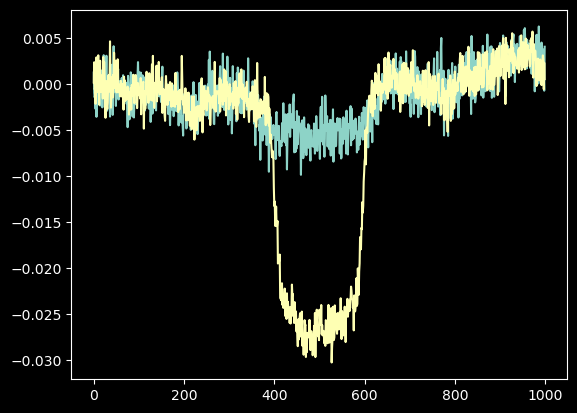

In [284]:
plt.plot(water_world_abs4_8000[30])
plt.plot(water_world_abs4_3000[30])
#plt.plot(water_world_abs4_3000[10])

1.8117841293167396

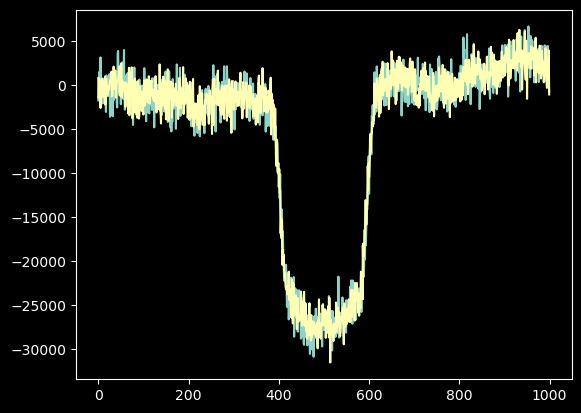

In [349]:


plt.plot(water_world_abs4_7000[30]*10**6)
plt.plot(water_world_abs4_5000[30]*10**6)
#plt.plot(water_world_abs1_3000[10])
wave_range_abs4[30]

1.8117841293167396

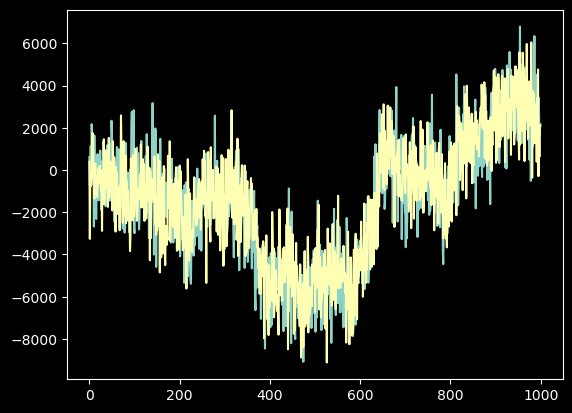

In [352]:


plt.plot(hot_jupiter_abs4_3000[30]*10**6)
plt.plot(hot_jupiter_abs4_4000[30]*10**6)
#plt.plot(hot_jupiter_abs4_5000[30]*10**6)
#plt.plot(hot_jupiter_abs4_6000[30]*10**6)
#plt.plot(hot_jupiter_abs4_7000[30]*10**6)
#plt.plot(hot_jupiter_abs4_8000[30]*10**6)
#plt.plot(water_world_abs1_3000[10])
wave_range_abs4[30]

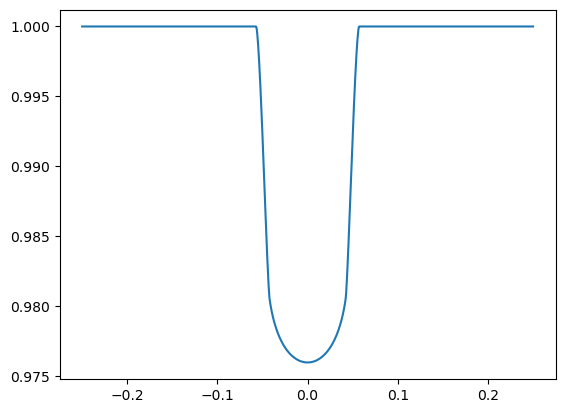

In [170]:

transit = model_water_world.light_curve(params_water_world)
plt.plot(t, transit)

t = np.linspace(-0.25, 0.25, 1000)

In [183]:
def division_noise_transit(target_array, ref_array, atm, params):
    new_array1 = []
    bin_size_array = [target_array[1][1]-target_array[1][0]]
    
    t = np.linspace(-0.25, 0.25, 1000)
    #print("right function!")
    bulk_transit_depth = params.rp**2
    print("bulk_transit_depth: "+str(bulk_transit_depth))
    print("bulk_rp: "+str(params.rp))
    #new_array2
    i=0
    for n in target_array[0][0]:
        if i >= len(atm["col5"]):
            break
        
        bin_size = target_array[1][i+1]-target_array[1][i]
        #print("bin size: "+str(bin_size))
        bin_size_array.append(bin_size)
        target_array_i = np.array(target_array[0][:,i])
        #print(target_array_i[50:60])
        #print("original target array"+str(target_array_i[0:10]))
        
        #adding transit
        atm_transit_i = atm["col5"][i]/10**6
        #print("atm transit: "+ str(atm_transit_i))
        #print("atm depth"+str(atm_transit_i))
        
        total_transit_depth = bulk_transit_depth + atm_transit_i
        #print("total transit depth: "+ str(total_transit_depth))
        rp_i = np.sqrt(total_transit_depth)
        #print("rp i : "+ str(rp_i))
        params.rp = rp_i
        print("edited param : "+ str(params.rp))
        #print("rp"+str(params.rp))
        model = batman.TransitModel(params, t)
        transit = model.light_curve(params)
        #print("transit model"+str(transit[500:510]))
        plt.plot(transit)
        
        #flux = stellar_flux_value*transmission
        transit_flux = transit*target_array_i
        #print("flux with transit"+str(transit_flux[0:10]))
        
        
        ref_array_i = np.array(ref_array[0][:,i])
        #print(ref_array_i[50:60])
        target_noise = photon_noise(transit_flux, bin_size)
        #print("target_noise: "+str(target_noise))
        ref_noise = photon_noise(ref_array_i, bin_size)
        #print("ref_noise: "+str(ref_noise))
        noisy_target_i = target_noise*transit_flux
        #print("target_noisy flux: "+str(noisy_target_i))
        noisy_ref_i = ref_noise*ref_array_i
        #print("ref_noisy flux: "+str(noisy_ref_i))
        divided_i = noisy_target_i/noisy_ref_i
        #print("div_noisy flux: "+str(divided_i))
        new_array1.append(divided_i)
        i+=1
        #if i == 3:
            #break
    return new_array1

#cold_star_abs1_test3[:,0]


bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
edited param : 0.14642560431837048
edited param : 0.1462792657897899
edited param : 0.14606559690769075
edited param : 0.14594442640950697
edited param : 0.1455685014005434
edited param : 0.14535267317803274
edited param : 0.14503401876801178
edited param : 0.14484141534795908
edited param : 0.14465796279500134
edited param : 0.14454859321349342
edited param : 0.1444483617075666
edited param : 0.14443419401235982
edited param : 0.14443602043811646
edited param : 0.1444433736797919
edited param : 0.1444447022219922
edited param : 0.14448673053259942
edited param : 0.1445455609833799
edited param : 0.14467846349750885
edited param : 0.1448621261752015
edited param : 0.14499621926105521
edited param : 0.14544023377318946
edited param : 0.14602477392552266
edited param : 0.14685863134320706
edited param : 0.14764999356586508
edited param : 0.14752384078514225
edited param : 0.14752935843417742
edited param : 0.14781723715453485
edited param

'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

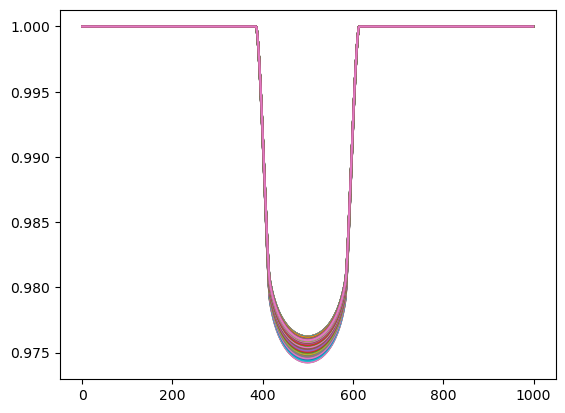

In [185]:
#params_water_world.rp = 0.14434  
#divided_water_world_abs1_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, .6, 1, water_world_abs1, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs2_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, 1, 1.25, water_world_abs2, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs3_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, water_world_abs3, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs4_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, water_world_abs4, params_water_world)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

In [186]:
water_world_abs1_3000 = normalize(divided_water_world_abs1_3000)
water_world_abs2_3000 = normalize(divided_water_world_abs2_3000)

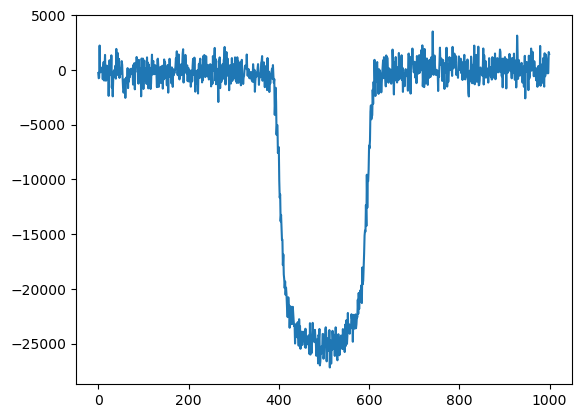

In [188]:
plt.plot(water_world_abs2_3000[30]*10**6)

bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
edited param : 0.14460068568302156
edited param : 0.1445689164378014
edited param : 0.14455417842456164
edited param : 0.1445457232158738
edited param : 0.14454556271293836
edited param : 0.14456024730194672
edited param : 0.14458097212289037
edited param : 0.1445778333632096
edited param : 0.14454365015454673
edited param : 0.14453764907455774
edited param : 0.1445207881240619
edited param : 0.14452217995864855
edited param : 0.1445180210216013
edited param : 0.1445171768337591
edited param : 0.14452078535629398
edited param : 0.14458554457482947
edited param : 0.1445509211316206
edited param : 0.14454314995875797
edited param : 0.14454943375883558
edited param : 0.1445282602123197
edited param : 0.14451842858265515
edited param : 0.1445047175700503
edited param : 0.14449404762826737
edited param : 0.14448096552833525
edited param : 0.14447425687644147
edited param : 0.1444733757479211
edited param : 0.14447707845883373
edited param : 

'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

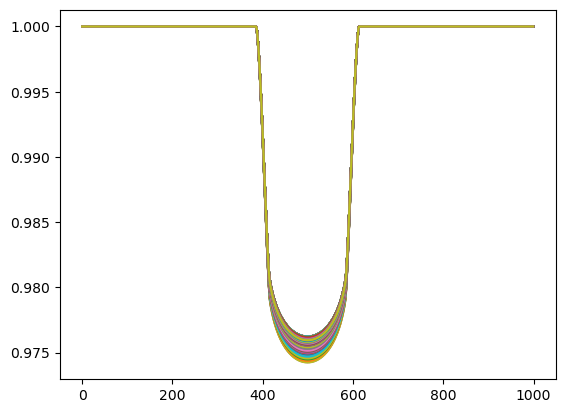

In [189]:
params_water_world.rp = 0.14434  
divided_water_world_abs1_5000 = bin_divide(target_spec, ref_spec_5000, target_star_pwv, comparison_star_pwv, .6, 1, water_world_abs1, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs2_5000 = bin_divide(target_spec, ref_spec_5000, target_star_pwv, comparison_star_pwv, 1, 1.25, water_world_abs2, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs3_5000 = bin_divide(target_spec, ref_spec_5000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, water_world_abs3, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs4_5000 = bin_divide(target_spec, ref_spec_5000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, water_world_abs4, params_water_world)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)

#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.0208340356
bulk_rp: 0.14434
edited param : 0.14460068568302156
edited param : 0.1445689164378014
edited param : 0.14455417842456164
edited param : 0.1445457232158738
edited param : 0.14454556271293836
edited param : 0.14456024730194672
edited param : 0.14458097212289037
edited param : 0.1445778333632096
edited param : 0.14454365015454673
edited param : 0.14453764907455774
edited param : 0.1445207881240619
edited param : 0.14452217995864855
edited param : 0.1445180210216013
edited param : 0.1445171768337591
edited param : 0.14452078535629398
edited param : 0.14458554457482947
edited param : 0.1445509211316206
edited param : 0.14454314995875797
edited param : 0.14454943375883558
edited param : 0.1445282602123197
edited param : 0.14451842858265515
edited param : 0.1445047175700503
edited param : 0.14449404762826737
edited param : 0.14448096552833525
edited param : 0.14447425687644147
edited param : 0.1444733757479211
edited param : 0.14447707845883373
edited param : 

'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

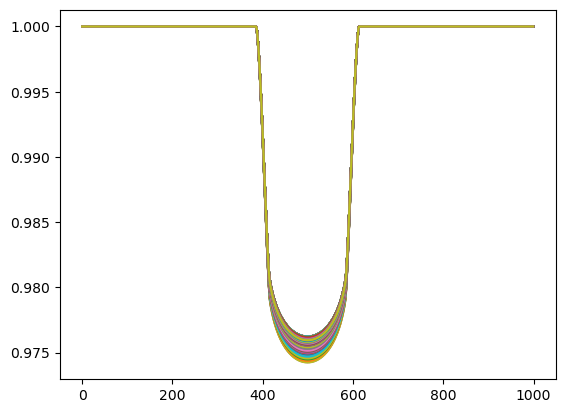

In [190]:
params_water_world.rp = 0.14434  
divided_water_world_abs1_7000 = bin_divide(target_spec, ref_spec_7000, target_star_pwv, comparison_star_pwv, .6, 1, water_world_abs1, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs2_7000 = bin_divide(target_spec, ref_spec_7000, target_star_pwv, comparison_star_pwv, 1, 1.25, water_world_abs2, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs3_7000 = bin_divide(target_spec, ref_spec_7000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, water_world_abs3, params_water_world)
params_water_world.rp = 0.14434 
divided_water_world_abs4_7000 = bin_divide(target_spec, ref_spec_7000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, water_world_abs4, params_water_world)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.012769
bulk_rp: 0.113
edited param : 0.11321607792182169
edited param : 0.11321243924587086
edited param : 0.11321790980229232
edited param : 0.11323934563569325
edited param : 0.11327540686309628
edited param : 0.11333262945859855
edited param : 0.11338452363528279
edited param : 0.11343227362615986
edited param : 0.11346038956393549
edited param : 0.11347683023419362
edited param : 0.11346851105042315
edited param : 0.11347852219693381
edited param : 0.11347312457141559
edited param : 0.11348140376290734
edited param : 0.11352783799579731
edited param : 0.11347264428046083
edited param : 0.11348796852530228
edited param : 0.11351632481718213
edited param : 0.11352106852915013
edited param : 0.11349148426203616
edited param : 0.11347641605197091
edited param : 0.11350578399359215
edited param : 0.11350034361181467
edited param : 0.11348342610266929
edited param : 0.11348317496439726
edited param : 0.11348012601332447
edited param : 0.11348124955251418
edited para

'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

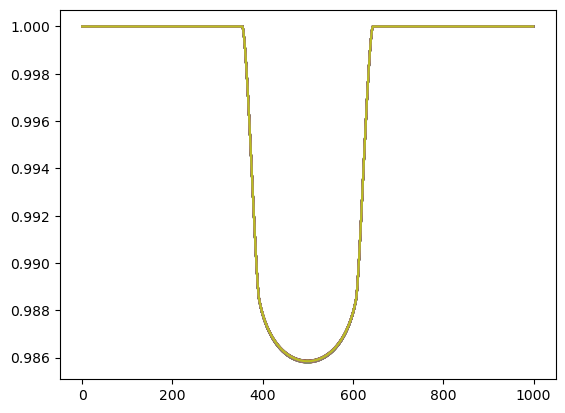

In [192]:
#params_warm_jupiter.rp = 0.113  
#divided_warm_jupiter_abs1_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, .6, 1, warm_jupiter_abs1, params_warm_jupiter)
#params_warm_jupiter.rp = 0.113 
#divided_water_world_abs2_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, 1, 1.25, warm_jupiter_abs2, params_warm_jupiter)
#params_warm_jupiter.rp = 0.113 
#divided_warm_jupiter_abs3_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, warm_jupiter_abs3, params_warm_jupiter)
params_warm_jupiter.rp = 0.113 
divided_warm_jupiter_abs4_3000 = bin_divide(target_spec, ref_spec_3000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, warm_jupiter_abs4, params_warm_jupiter)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

bulk_transit_depth: 0.012769
bulk_rp: 0.113
edited param : 0.11316075821591158
edited param : 0.11315464153095975
edited param : 0.11315061245967695
edited param : 0.11314693588427395
edited param : 0.11314590889643338
edited param : 0.11315065355533746
edited param : 0.11315771162408686
edited param : 0.11315637145119138
edited param : 0.11314358311455405
edited param : 0.11313796047304371
edited param : 0.11313277597584177
edited param : 0.11313232208347887
edited param : 0.11313094492666452
edited param : 0.11313068505052024
edited param : 0.11313206309442077
edited param : 0.11314344081739781
edited param : 0.11313547056515919
edited param : 0.1131332497544378
edited param : 0.11313458622366548
edited param : 0.11313071775605422
edited param : 0.11313077211793439
edited param : 0.11312608717709634
edited param : 0.11312104667125389
edited param : 0.11311432225850093
edited param : 0.1131104256910034
edited param : 0.1131094271049058
edited param : 0.1131102524088776
edited param : 

'\nstd dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from\nref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux\nof ref star was about 2, flux of target star was about 15 (?)\n'

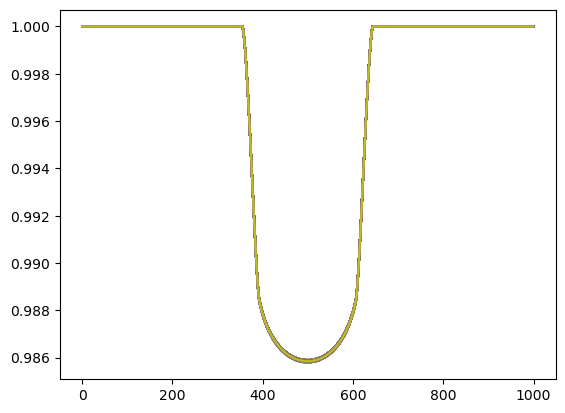

In [194]:
params_warm_jupiter.rp = 0.113  
divided_warm_jupiter_abs1_8000 = bin_divide(target_spec, ref_spec_8000, target_star_pwv, comparison_star_pwv, .6, 1, warm_jupiter_abs1, params_warm_jupiter)
params_warm_jupiter.rp = 0.113 
divided_water_world_abs2_8000 = bin_divide(target_spec, ref_spec_8000, target_star_pwv, comparison_star_pwv, 1, 1.25, warm_jupiter_abs2, params_warm_jupiter)
params_warm_jupiter.rp = 0.113 
divided_warm_jupiter_abs3_8000 = bin_divide(target_spec, ref_spec_8000, target_star_pwv, comparison_star_pwv, 1.25, 1.56, warm_jupiter_abs3, params_warm_jupiter)
params_warm_jupiter.rp = 0.113 
divided_warm_jupiter_abs4_8000 = bin_divide(target_spec, ref_spec_8000, target_star_pwv, comparison_star_pwv, 1.56, 2.1, warm_jupiter_abs4, params_warm_jupiter)

#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, .6, 1, 200)
#ref_binned = binned_flux_pwv_v2(ref_spec, comparison_star_pwv, .6, 1, 200)

#target_stacked = stacking(target_binned)
#ref_stacked = stacking(ref_binned)


#divided = division_noise_transit(target_stacked, ref_stacked, hot_jupiter_abs1, params_hot_jupiter)

'''
std dev of ref was 0.000311, which is close to 10**-3.5 (.000316). I think the error of the model is set by photon noise from
ref star, but the photon count might be wrong. Maybe binning (adding flux) and then multiplying by wave range? Flux
of ref star was about 2, flux of target star was about 15 (?)
'''

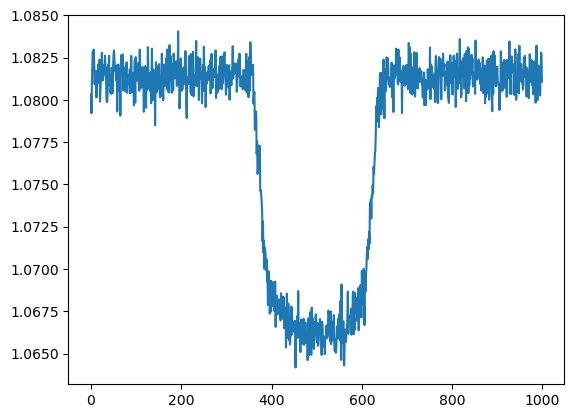

In [193]:
plt.plot(divided_warm_jupiter_abs4_3000[10])

In [196]:
water_world_abs1_3000 = normalize(divided_water_world_abs1_3000)
water_world_abs2_3000 = normalize(divided_water_world_abs2_3000)
water_world_abs3_3000 = normalize(divided_water_world_abs3_3000)
water_world_abs4_3000 = normalize(divided_water_world_abs4_3000)

water_world_abs1_5000 = normalize(divided_water_world_abs1_5000)
water_world_abs2_5000 = normalize(divided_water_world_abs2_5000)
water_world_abs3_5000 = normalize(divided_water_world_abs3_5000)
water_world_abs4_5000 = normalize(divided_water_world_abs4_5000)

water_world_abs1_7000 = normalize(divided_water_world_abs1_7000)
water_world_abs2_7000 = normalize(divided_water_world_abs2_7000)
water_world_abs3_7000 = normalize(divided_water_world_abs3_7000)
water_world_abs4_7000 = normalize(divided_water_world_abs4_7000)



In [197]:
warm_jupiter_abs1_3000 = normalize(divided_warm_jupiter_abs1_3000)
warm_jupiter_abs2_3000 = normalize(divided_warm_jupiter_abs2_3000)
warm_jupiter_abs3_3000 = normalize(divided_warm_jupiter_abs3_3000)
warm_jupiter_abs4_3000 = normalize(divided_warm_jupiter_abs4_3000)

warm_jupiter_abs1_8000 = normalize(divided_warm_jupiter_abs1_8000)
warm_jupiter_abs2_8000 = normalize(divided_warm_jupiter_abs2_8000)
warm_jupiter_abs3_8000 = normalize(divided_warm_jupiter_abs3_8000)
warm_jupiter_abs4_8000 = normalize(divided_warm_jupiter_abs4_8000)

In [379]:
'''
d = {}
i=0
for n in water_array:
    water_content = str(water_array[i])
    d["data"+water_content] = ascii.read("transmission{0}_hi_res.dat".format(water_content))
    d["data"+water_content+"_pd"] = d["data"+water_content].to_pandas()
    #print(d["data"+water_content+"_pd"])
    i+=1
'''

d_model = {}

def depth_fit(diff_array, exo_type, ref_temp, abs_wave):
    if abs_wave == 1:
        wave_range = wave_range_abs1
        range_value = 20
    elif abs_wave == 2:
        wave_range = wave_range_abs2
        range_value = 8
    elif abs_wave == 3:
        wave_range = wave_range_abs3
        range_value = 8
    else:
        wave_range = wave_range_abs4
        range_value = 11
        
    if exo_type == "hot_jupiter":
        times = np.linspace(-0.5, 0.5, 1000)
    else:
        times = np.linspace(-0.25, 0.25, 1000)
    depth_array = []
    std_dev_array = []
    df_array = []
    wavelength_array = []
    i=0
    
    #times = 
    for n in range(range_value):
        wavelength = wave_range[i]
        
        wave_rounded = np.round(wavelength, 4)
        print(wave_rounded)
        d_model["depth"+str(exo_type)+str(wave_rounded)+str(ref_temp)], d_model["std"+str(exo_type)+str(wave_rounded)+str(ref_temp)], d_model["df"+str(exo_type)+str(wave_rounded)+str(ref_temp)] = fit_lightcurve(times, diff_array[i]+1)
        depth_array.append(d_model["depth"+str(exo_type)+str(wave_rounded)+str(ref_temp)])
        std_dev_array.append(d_model["std"+str(exo_type)+str(wave_rounded)+str(ref_temp)])
        df_array.append(d_model["df"+str(exo_type)+str(wave_rounded)+str(ref_temp)])
        wavelength_array.append(wavelength)
        
        
        i+=1
    
    return depth_array, std_dev_array, df_array, wavelength_array

In [ ]:
corner(df[['rp_rs2', 'loge']], labels = ['Rp_Rs2', 'Log_error']) # show corner plot
plt.show()

In [354]:
#corner(model_hot_jupiter_abs2[2][0]['rp_rs'], labels = ['Rp_Rs2'])
#model_hot_jupiter_abs2[2][0]["rp_rs"]

In [256]:
%run Model.ipynb
#model_hot_jupiter_abs1 = depth_fit(hot_jupiter_abs1_3000, "hot_jupiter", 3000, 1)

In [257]:
model_hot_jupiter_abs2 = depth_fit(hot_jupiter_abs2_3000, "hot_jupiter", 3000, 2)

1


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.0253


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.0511


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.0777


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.1049


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.1328


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.1614


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.1907


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

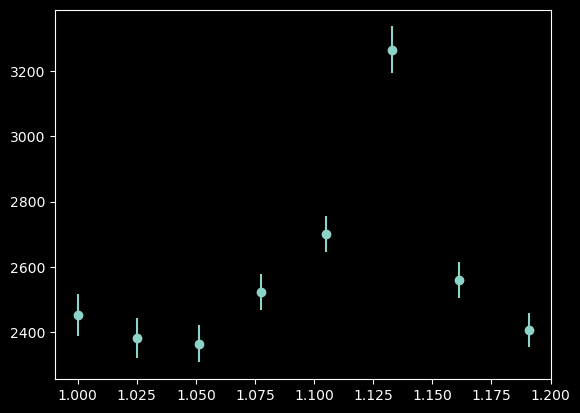

In [345]:
plt.errorbar(model_hot_jupiter_abs2[3], model_hot_jupiter_abs2[0], model_hot_jupiter_abs2[1], ls="none")
plt.scatter(model_hot_jupiter_abs2[3], model_hot_jupiter_abs2[0])

In [261]:
model_hot_jupiter_abs2_array = np.array(model_hot_jupiter_abs2, dtype="object")
np.save("hot_jupiter_abs2.npy", model_hot_jupiter_abs2_array)

In [262]:
model_hot_jupiter_abs3 = depth_fit(hot_jupiter_abs3_3000, "hot_jupiter", 3000, 3)
model_hot_jupiter_abs3_array = np.array(model_hot_jupiter_abs3, dtype="object")
np.save("hot_jupiter_abs3.npy", model_hot_jupiter_abs3_array)

1.25


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.2816


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.3139


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.3471


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.3811


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.416


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.4518


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.4884


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

In [259]:
model_hot_jupiter_abs4 = depth_fit(hot_jupiter_abs4_3000, "hot_jupiter", 3000, 4)
model_hot_jupiter_abs4_array = np.array(model_hot_jupiter_abs4, dtype="object")
np.save("hot_jupiter_abs4.npy", model_hot_jupiter_abs4_array)

1.56


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.5994


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.6398


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.6812


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.7236


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.7672


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.8118


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.8575


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.9044


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.9525


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

2.0018


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

In [260]:
model_hot_jupiter_abs1_hotref = depth_fit(hot_jupiter_abs1_8000, "hot_jupiter", 8000, 1)
model_hot_jupiter_abs2_hotref = depth_fit(hot_jupiter_abs2_8000, "hot_jupiter", 8000, 2)
model_hot_jupiter_abs3_hotref = depth_fit(hot_jupiter_abs3_8000, "hot_jupiter", 8000, 3)
model_hot_jupiter_abs4_hotref = depth_fit(hot_jupiter_abs4_8000, "hot_jupiter", 8000, 4)

0.6


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

0.6152


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

0.6307


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

0.6466


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

0.6629


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

0.6797


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

0.6968


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

0.7144


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

0.7325


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

0.751


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

0.7699


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

0.7894


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

0.8093


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

0.8297


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

0.8507


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

0.8722


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

0.8942


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

0.9168


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

0.9399


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

0.9637


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.0253


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.0511


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.0777


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.1049


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.1328


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.1614


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.1907


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.25


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.2816


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.3139


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.3471


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.3811


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.416


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.4518


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.4884


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.56


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.5994


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.6398


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.6812


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.7236


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.7672


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.8118


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.8575


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.9044


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.9525


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

2.0018


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

In [263]:
model_hot_jupiter_abs1_hotref_array = np.array(model_hot_jupiter_abs1_hotref, dtype="object")
np.save("hot_jupiter_abs1_hotref.npy", model_hot_jupiter_abs1_hotref_array)

model_hot_jupiter_abs2_hotref_array = np.array(model_hot_jupiter_abs2_hotref, dtype="object")
np.save("hot_jupiter_abs2_hotref.npy", model_hot_jupiter_abs2_hotref_array)

model_hot_jupiter_abs3_hotref_array = np.array(model_hot_jupiter_abs3_hotref, dtype="object")
np.save("hot_jupiter_abs3_hotref.npy", model_hot_jupiter_abs3_hotref_array)

model_hot_jupiter_abs4_hotref_array = np.array(model_hot_jupiter_abs4_hotref, dtype="object")
np.save("hot_jupiter_abs4_hotref.npy", model_hot_jupiter_abs4_hotref_array)

In [252]:
len(wave_range_abs4)

60

In [246]:
model_hot_jupiter_abs1_array = np.array(model_hot_jupiter_abs1, dtype="object")
np.save("hot_jupiter_abs1.npy", model_hot_jupiter_abs1_array)

In [207]:
#linspace(0, 10, 1000)

In [ ]:
transit_depth_hot_jupiter1_25, std_dev_transit_depth_jupiter1_25, df_jupiter1_25 = fit_lightcurve(times, hotjupiter1_25microns)
transit_depth_hot_jupiter1_31, std_dev_transit_depth_jupiter1_31, df_jupiter1_31 = fit_lightcurve(times, hotjupiter1_31microns)
transit_depth_hot_jupiter1_38, std_dev_transit_depth_jupiter1_38, df_jupiter1_38 = fit_lightcurve(times, hotjupiter1_38microns)
transit_depth_hot_jupiter1_45, std_dev_transit_depth_jupiter1_45, df_jupiter1_45 = fit_lightcurve(times, hotjupiter1_45microns)

In [272]:
wave_range_abs3[11]

1.3204947908762434

In [283]:
#.6-1
model_water_world_abs1_hotref = depth_fit(water_world_abs1_7000, "water_world", 8000, 1)
#model_water_world_abs2_hotref = depth_fit(water_world_abs2_7000, "water_world", 8000, 2)
#model_water_world_abs3_hotref = depth_fit(water_world_abs3_7000, "water_world", 8000, 3)
#model_water_world_abs4_hotref = depth_fit(water_world_abs4_7000, "water_world", 8000, 4)

1.25


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.2816


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.3139


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.3471


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.3811


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.416


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.4518


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

1.4884


Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

In [293]:
#model_water_world_abs1_hotref

In [282]:
np.save("water_world_abs1_hotref.npy", model_water_world_abs1_hotref, "dtype=object")

In [308]:
np.save("water_world_abs3_hotref.npy", model_water_world_abs3_hotref, "dtype=object")

1.3139251650509884


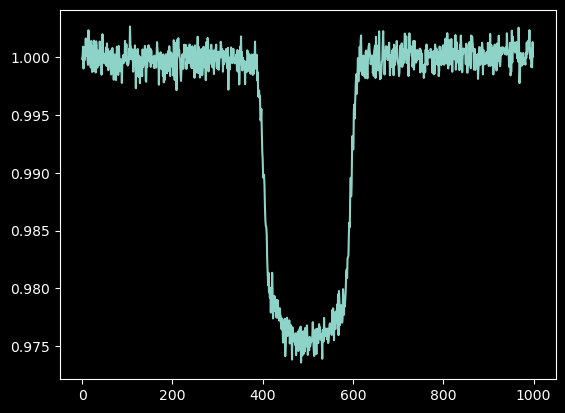

In [336]:
plt.plot(water_world_abs3_7000[10]+1)
print(wave_range_abs3[10])

In [334]:
times = linspace(-.25, .25, 1000)

depth, std_dev, df = fit_lightcurve(times, water_world_abs3_7000[10]+1)

Global optimization:   0%|          | 0/200 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

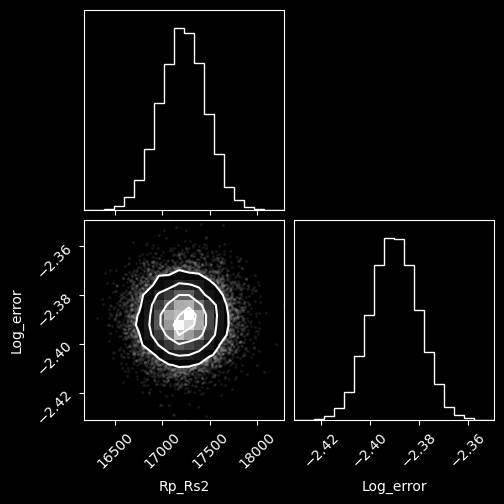

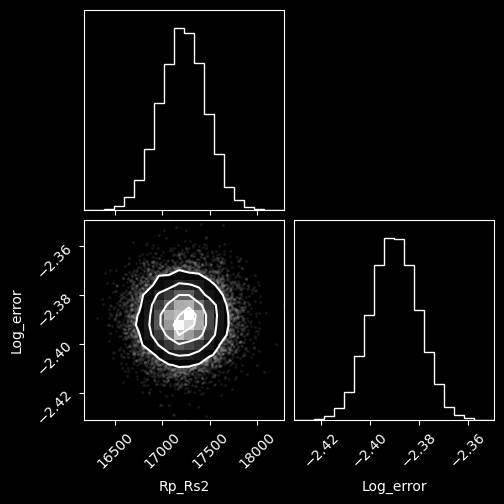

In [335]:
corner(df[['rp_rs2', 'loge']], labels = ['Rp_Rs2', 'Log_error'])

In [407]:
'''
d = {}
i=0
for n in water_array:
    water_content = str(water_array[i])
    d["data"+water_content] = ascii.read("transmission{0}_hi_res.dat".format(water_content))
    d["data"+water_content+"_pd"] = d["data"+water_content].to_pandas()
    #print(d["data"+water_content+"_pd"])
    i+=1
'''

d_model = {}

def depth_fit(diff_array, exo_type, ref_temp, abs_wave):
    
    if abs_wave == 1:
        wave_range = wave_range_abs1
        range_value = 20
    elif abs_wave == 2:
        wave_range = wave_range_abs2
        range_value = 8
    elif abs_wave == 3:
        wave_range = wave_range_abs3
        range_value = 8
    else:
        wave_range = wave_range_abs4
        range_value = 11
        
    if exo_type == "hot_jupiter":
        times = np.linspace(-0.5, 0.5, 1000)
    else:
        times = np.linspace(-0.25, 0.25, 1000)
    
    depth_array = []
    std_dev_array = []
    df_array = []
    wavelength_array = []
    i=0
    
    #times = 
    for n in diff_array:
        #wave_range = wave_range_abs1
        wavelength = wave_range[i]
        
        wave_rounded = np.round(wavelength, 4)
        print(wave_rounded)
        d_model["depth"+str(exo_type)+str(wave_rounded)+str(ref_temp)], d_model["std"+str(exo_type)+str(wave_rounded)+str(ref_temp)], d_model["df"+str(exo_type)+str(wave_rounded)+str(ref_temp)] = fit_lightcurve(times, diff_array[i]+1)
        depth_array.append(d_model["depth"+str(exo_type)+str(wave_rounded)+str(ref_temp)])
        std_dev_array.append(d_model["std"+str(exo_type)+str(wave_rounded)+str(ref_temp)])
        df_array.append(d_model["df"+str(exo_type)+str(wave_rounded)+str(ref_temp)])
        wavelength_array.append(wavelength)
        
        
        i+=1
    
    return np.array(depth_array), np.array(std_dev_array)*np.sqrt(2), np.array(df_array), np.array(wavelength_array)

In [ ]:
hot_jupiter_abs1_3000 = normalize(divided_hot_jupiter_abs1_3000)
hot_jupiter_abs2_3000 = normalize(divided_hot_jupiter_abs2_3000)
hot_jupiter_abs3_3000 = normalize(divided_hot_jupiter_abs3_3000)
hot_jupiter_abs4_3000 = normalize(divided_hot_jupiter_abs4_3000)

hot_jupiter_abs1_4000 = normalize(divided_hot_jupiter_abs1_4000)
hot_jupiter_abs2_4000 = normalize(divided_hot_jupiter_abs2_4000)
hot_jupiter_abs3_4000 = normalize(divided_hot_jupiter_abs3_4000)
hot_jupiter_abs4_4000 = normalize(divided_hot_jupiter_abs4_4000)

hot_jupiter_abs1_5000 = normalize(divided_hot_jupiter_abs1_5000)
hot_jupiter_abs2_5000 = normalize(divided_hot_jupiter_abs2_5000)
hot_jupiter_abs3_5000 = normalize(divided_hot_jupiter_abs3_5000)
hot_jupiter_abs4_5000 = normalize(divided_hot_jupiter_abs4_5000)

hot_jupiter_abs1_6000 = normalize(divided_hot_jupiter_abs1_6000)
hot_jupiter_abs2_6000 = normalize(divided_hot_jupiter_abs2_6000)
hot_jupiter_abs3_6000 = normalize(divided_hot_jupiter_abs3_6000)
hot_jupiter_abs4_6000 = normalize(divided_hot_jupiter_abs4_6000)

hot_jupiter_abs1_7000 = normalize(divided_hot_jupiter_abs1_7000)
hot_jupiter_abs2_7000 = normalize(divided_hot_jupiter_abs2_7000)
hot_jupiter_abs3_7000 = normalize(divided_hot_jupiter_abs3_7000)
hot_jupiter_abs4_7000 = normalize(divided_hot_jupiter_abs4_7000)

hot_jupiter_abs1_8000 = normalize(divided_hot_jupiter_abs1_8000)
hot_jupiter_abs2_8000 = normalize(divided_hot_jupiter_abs2_8000)
hot_jupiter_abs3_8000 = normalize(divided_hot_jupiter_abs3_8000)
hot_jupiter_abs4_8000 = normalize(divided_hot_jupiter_abs4_8000)



In [370]:
len(hot_jupiter_abs1_8000)
len(wave_range_abs1)

103

In [410]:
#model_hot_jupiter_abs1_8000
#plt.plot(

#atm_signal4
model_depth = model_hot_jupiter_abs1_8000[0]
model_depth1 = np.append(model_depth, model_hot_jupiter_abs2_8000[0])
model_depth2 = np.append(model_depth1, model_hot_jupiter_abs3_8000[0])
model_depth3 = np.append(model_depth2, model_hot_jupiter_abs4_8000[0])
len(model_depth3)

249

In [ ]:
plt.plot(

In [406]:
%run Model.ipynb
#model_hot_jupiter_abs1_8000 = depth_fit(hot_jupiter_abs1_8000, "hot_jupiter", 8000, 1)#

In [409]:
#model_hot_jupiter_abs1_8000 = depth_fit(hot_jupiter_abs1_8000, "hot_jupiter", 8000, 1)
#model_hot_jupiter_abs2_8000 = depth_fit(hot_jupiter_abs2_8000, "hot_jupiter", 8000, 2)
#model_hot_jupiter_abs3_8000 = depth_fit(hot_jupiter_abs3_8000, "hot_jupiter", 8000, 3)
#model_hot_jupiter_abs4_8000 = depth_fit(hot_jupiter_abs4_8000, "hot_jupiter", 8000, 4)

In [359]:
#model_hot_jupiter_abs1_5000 = depth_fit(hot_jupiter_abs1_5000, "hot_jupiter", 5000, 1)
#model_hot_jupiter_abs2_5000 = depth_fit(hot_jupiter_abs2_5000, "hot_jupiter", 5000, 2)
#model_hot_jupiter_abs3_5000 = depth_fit(hot_jupiter_abs3_5000, "hot_jupiter", 5000, 3)
#model_hot_jupiter_abs4_5000 = depth_fit(hot_jupiter_abs4_5000, "hot_jupiter", 5000, 4)

In [396]:
atm_signal2 = np.append(atm_signal, hot_jupiter_abs2["col5"])

In [417]:
atm_signal3 = np.append(atm_signal2, hot_jupiter_abs3["col5"])
atm_signal4 = np.append(atm_signal3, hot_jupiter_abs4["col5"][0:59])
len(atm_signal4)

252

In [432]:
hot_jupiter_abs1_injected_transit = hot_jupiter_abs1["col5"][0:-1]
hot_jupiter_abs2_injected_transit = hot_jupiter_abs2["col5"][0:-1]
hot_jupiter_abs3_injected_transit = hot_jupiter_abs3["col5"][0:-1]
hot_jupiter_abs4_injected_transit = hot_jupiter_abs4["col5"][0:59]
hot_jupiter_injected_transit = np.concatenate((hot_jupiter_abs1_injected_transit, hot_jupiter_abs2_injected_transit, hot_jupiter_abs3_injected_transit, hot_jupiter_abs4_injected_transit))

#model_hot_jupiter_abs1_8000 = np.concatenate((model_hot_jupiter_abs1_8000[0], model_hot_jupiter_abs2_8000[0], model_hot_jupiter_abs3_8000[0], model_hot_jupiter_abs4_8000[0]))

model_hot_jupiter_abs1_8000_wave = np.concatenate((model_hot_jupiter_abs1_8000[3], model_hot_jupiter_abs2_8000[3], model_hot_jupiter_abs3_8000[3], model_hot_jupiter_abs4_8000[3]))

model_hot_jupiter_abs1_8000_std = np.concatenate((model_hot_jupiter_abs1_8000[1], model_hot_jupiter_abs2_8000[1], model_hot_jupiter_abs3_8000[1], model_hot_jupiter_abs4_8000[1]))




ValueError: zero-dimensional arrays cannot be concatenated

In [433]:
print(len(hot_jupiter_injected_transit))
print(len(model_hot_jupiter_abs1_8000))

model_hot_jupiter_abs1_8000[3]

249
249


2631.9491861901715

In [456]:
#model_hot_jupiter_abs1_8000

In [402]:
#atm_signal4
model_depth = model_hot_jupiter_abs1_8000[0]
model_depth1 = np.append(model_depth, model_hot_jupiter_abs2_8000[0])
model_depth2 = np.append(model_depth1, model_hot_jupiter_abs3_8000[0])
model_depth3 = np.append(model_depth2, model_hot_jupiter_abs4_8000[0])
len(model_depth3)

129

In [419]:
print(len(model_hot_jupiter_abs1_8000[0]))
print(len(model_hot_jupiter_abs2_8000[0]))
print(len(model_hot_jupiter_abs3_8000[0]))
print(len(model_hot_jupiter_abs4_8000[0]))

102
44
44
59


  col5 
-------
538.053
533.794
529.542
525.298
521.099
517.016
512.995
    ...
245.759
257.201
254.126
259.345
265.445
262.477
272.624
Length = 103 rows


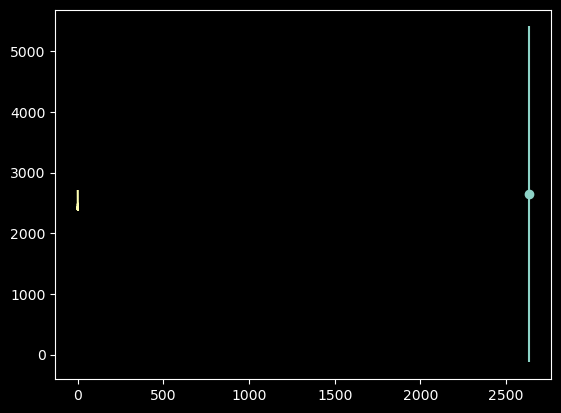

In [434]:
model_hot_jupiter_abs1_5000
plt.scatter(model_hot_jupiter_abs1_8000[3], model_hot_jupiter_abs1_8000[0])
plt.errorbar(model_hot_jupiter_abs1_8000[3], model_hot_jupiter_abs1_8000[0], model_hot_jupiter_abs1_8000[1], ls="none")

atm_signal = hot_jupiter_abs1["col5"]
bulk_transit = (0.04644**2)*10**6

#bulk_transit_depth = np.sqrt(bulk_transit)
#print(bulk_transit_depth)
total_depth = (atm_signal+bulk_transit)
print(atm_signal)

plt.plot(hot_jupiter_abs1["col1"], total_depth)

  col5 
-------
282.985
277.875
271.418
269.097
255.799
 248.06
240.819
    ...
330.276
326.345
308.172
303.655
291.776
289.186
286.199
Length = 45 rows


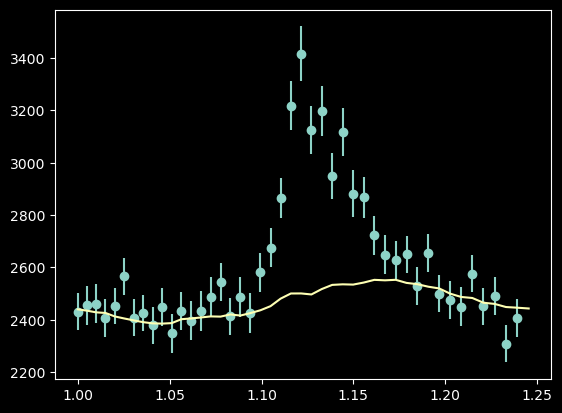

In [411]:
#model_hot_jupiter_abs2_5000
plt.scatter(model_hot_jupiter_abs2_8000[3], model_hot_jupiter_abs2_8000[0])
plt.errorbar(model_hot_jupiter_abs2_8000[3], model_hot_jupiter_abs2_8000[0], model_hot_jupiter_abs2_8000[1], ls="none")

atm_signal = hot_jupiter_abs2["col5"]
bulk_transit = (0.04644**2)*10**6

#bulk_transit_depth = np.sqrt(bulk_transit)
#print(bulk_transit_depth)
total_depth = (atm_signal+bulk_transit)
print(atm_signal)

plt.plot(hot_jupiter_abs2["col1"], total_depth)

  col5 
-------
285.574
297.726
301.974
300.368
  303.7
304.953
310.524
    ...
468.512
460.766
455.726
445.314
442.407
437.696
476.882
Length = 45 rows


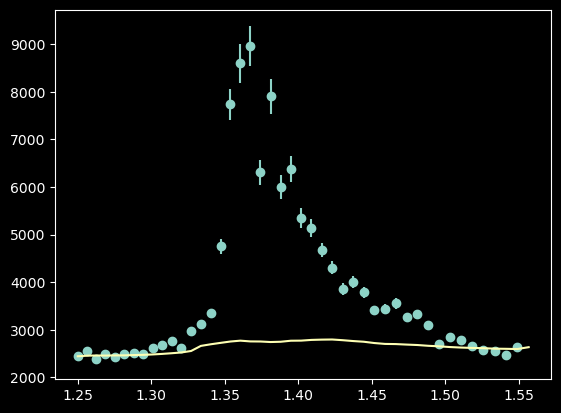

In [412]:
#model_hot_jupiter_abs2_5000
plt.scatter(model_hot_jupiter_abs3_8000[3], model_hot_jupiter_abs3_8000[0])
plt.errorbar(model_hot_jupiter_abs3_8000[3], model_hot_jupiter_abs3_8000[0], model_hot_jupiter_abs3_8000[1], ls="none")

atm_signal = hot_jupiter_abs3["col5"]
bulk_transit = (0.04644**2)*10**6

#bulk_transit_depth = np.sqrt(bulk_transit)
#print(bulk_transit_depth)
total_depth = (atm_signal+bulk_transit)
print(atm_signal)

plt.plot(hot_jupiter_abs3["col1"], total_depth)

  col5 
-------
549.959
473.368
486.524
 529.01
515.699
596.408
581.351
    ...
1002.58
936.304
969.174
1013.76
975.533
1026.27
984.679
Length = 87 rows


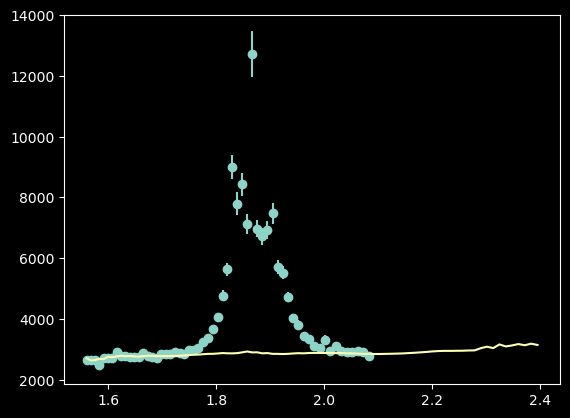

In [413]:
#model_hot_jupiter_abs2_5000
plt.scatter(model_hot_jupiter_abs4_8000[3], model_hot_jupiter_abs4_8000[0])
plt.errorbar(model_hot_jupiter_abs4_8000[3], model_hot_jupiter_abs4_8000[0], model_hot_jupiter_abs4_8000[1], ls="none")

atm_signal = hot_jupiter_abs4["col5"]
bulk_transit = (0.04644**2)*10**6

#bulk_transit_depth = np.sqrt(bulk_transit)
#print(bulk_transit_depth)
total_depth = (atm_signal+bulk_transit)
print(atm_signal)

plt.plot(hot_jupiter_abs4["col1"], total_depth)

In [415]:
len(model_hot_jupiter_abs4_8000[0])

59

In [416]:
len(hot_jupiter_abs4["col1"][0:59])

59

In [390]:
0.04644**2

0.0021566736

In [365]:
hot_jupiter_abs1

col1,col2,col3,col4,col5
float64,float64,float64,float64,float64
0.6,537.79074,997340.0,537.791,538.053
0.603,533.51614,997340.0,533.516,533.794
0.606015,529.25117,997340.0,529.251,529.542
0.609045075,524.98399,997340.0,524.984,525.298
0.6120903004,520.7626,997340.0,520.763,521.099
0.6151507519,516.64643,997340.0,516.646,517.016
...,...,...,...,...
0.9684856251,232.50394,997340.0,232.504,245.759
0.9733280532,243.56604,997340.0,243.566,257.201


In [ ]:
plt.plot(

In [448]:
'''
#model_hot_jupiter_abs1_3000 = depth_fit(hot_jupiter_abs1_3000, "hot_jupiter", 3000, 1)
model_hot_jupiter_abs2_3000 = depth_fit(hot_jupiter_abs2_3000, "hot_jupiter", 3000, 2)
model_hot_jupiter_abs3_3000 = depth_fit(hot_jupiter_abs3_3000, "hot_jupiter", 3000, 3)
model_hot_jupiter_abs4_3000 = depth_fit(hot_jupiter_abs4_3000, "hot_jupiter", 3000, 4)
'''

'\n#model_hot_jupiter_abs1_3000 = depth_fit(hot_jupiter_abs1_3000, "hot_jupiter", 3000, 1)\nmodel_hot_jupiter_abs2_3000 = depth_fit(hot_jupiter_abs2_3000, "hot_jupiter", 3000, 2)\nmodel_hot_jupiter_abs3_3000 = depth_fit(hot_jupiter_abs3_3000, "hot_jupiter", 3000, 3)\nmodel_hot_jupiter_abs4_3000 = depth_fit(hot_jupiter_abs4_3000, "hot_jupiter", 3000, 4)\n'

In [436]:
#hot_jupiter_abs2_3000

In [443]:
#len(model_hot_jupiter_abs1_3000[0])

102

In [ ]:
hot_jupiter_abs1_injected_transit = hot_jupiter_abs1["col5"][0:-1]
hot_jupiter_abs2_injected_transit = hot_jupiter_abs2["col5"][0:-1]
hot_jupiter_abs3_injected_transit = hot_jupiter_abs3["col5"][0:-1]
hot_jupiter_abs4_injected_transit = hot_jupiter_abs4["col5"][0:59]
hot_jupiter_injected_transit = np.concatenate((hot_jupiter_abs1_injected_transit, hot_jupiter_abs2_injected_transit, hot_jupiter_abs3_injected_transit, hot_jupiter_abs4_injected_transit))

model_hot_jupiter_abs1_8000 = np.concatenate((model_hot_jupiter_abs1_8000[0], model_hot_jupiter_abs2_8000[0], model_hot_jupiter_abs3_8000[0], model_hot_jupiter_abs4_8000[0]))

model_hot_jupiter_abs1_8000_wave = np.concatenate((model_hot_jupiter_abs1_8000[3], model_hot_jupiter_abs2_8000[3], model_hot_jupiter_abs3_8000[3], model_hot_jupiter_abs4_8000[3]))

model_hot_jupiter_abs1_8000_std = np.concatenate((model_hot_jupiter_abs1_8000[1], model_hot_jupiter_abs2_8000[1], model_hot_jupiter_abs3_8000[1], model_hot_jupiter_abs4_8000[1]))




In [447]:
len(hot_jupiter_injected_transit)

#model_hot_jupiter_abs1_3000

249

In [450]:
len(hot_jupiter_injected_transit)

249

In [449]:
#conc_3000 = np.concatenate((model_hot_jupiter_abs1_3000[0], model_hot_jupiter_abs2_3000[0], model_hot_jupiter_abs3_3000[0], model_hot_jupiter_abs4_3000[0]))
#conc_3000_wave = np.concatenate((model_hot_jupiter_abs1_3000[3], model_hot_jupiter_abs2_3000[3], model_hot_jupiter_abs3_3000[3], model_hot_jupiter_abs4_3000[3]))
#conc_3000_std = np.concatenate((model_hot_jupiter_abs1_3000[1], model_hot_jupiter_abs2_3000[1], model_hot_jupiter_abs3_3000[1], model_hot_jupiter_abs4_3000[1]))


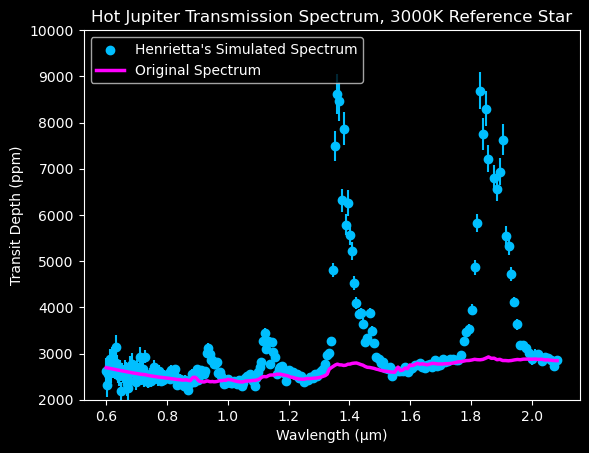

In [484]:
#model_hot_jupiter_abs2_5000
plt.scatter(conc_3000_wave, conc_3000, label="Henrietta's Simulated Spectrum", color="deepskyblue")
plt.errorbar(conc_3000_wave, conc_3000, conc_3000_std, ls="none", color="deepskyblue")

atm_signal = hot_jupiter_injected_transit
bulk_transit = (0.04644**2)*10**6

#bulk_transit_depth = np.sqrt(bulk_transit)
#print(bulk_transit_depth)
total_depth = (atm_signal+bulk_transit)
#print(atm_signal)

plt.plot(conc_3000_wave, total_depth, label="Original Spectrum", color="magenta", linewidth=2.5)
plt.title("Hot Jupiter Transmission Spectrum, 3000K Reference Star")
plt.xlabel("Wavlength (μm)")
plt.ylabel("Transit Depth (ppm)")

ax = plt.gca()
ax.set_ylim(2000, 10000)



plt.legend()

plt.savefig("3000KSpectrum")

In [471]:
'''
model_hot_jupiter_abs1_8000 = depth_fit(hot_jupiter_abs1_8000, "hot_jupiter", 8000, 1)
model_hot_jupiter_abs2_8000 = depth_fit(hot_jupiter_abs2_8000, "hot_jupiter", 8000, 2)
model_hot_jupiter_abs3_8000 = depth_fit(hot_jupiter_abs3_8000, "hot_jupiter", 8000, 3)
model_hot_jupiter_abs4_8000 = depth_fit(hot_jupiter_abs4_8000, "hot_jupiter", 8000, 4)
'''

'\nmodel_hot_jupiter_abs1_8000 = depth_fit(hot_jupiter_abs1_8000, "hot_jupiter", 8000, 1)\nmodel_hot_jupiter_abs2_8000 = depth_fit(hot_jupiter_abs2_8000, "hot_jupiter", 8000, 2)\nmodel_hot_jupiter_abs3_8000 = depth_fit(hot_jupiter_abs3_8000, "hot_jupiter", 8000, 3)\nmodel_hot_jupiter_abs4_8000 = depth_fit(hot_jupiter_abs4_8000, "hot_jupiter", 8000, 4)\n'

In [458]:
conc_8000 = np.concatenate((model_hot_jupiter_abs1_8000[0], model_hot_jupiter_abs2_8000[0], model_hot_jupiter_abs3_8000[0], model_hot_jupiter_abs4_8000[0]))
conc_8000_wave = np.concatenate((model_hot_jupiter_abs1_8000[3], model_hot_jupiter_abs2_8000[3], model_hot_jupiter_abs3_8000[3], model_hot_jupiter_abs4_8000[3]))
conc_8000_std = np.concatenate((model_hot_jupiter_abs1_8000[1], model_hot_jupiter_abs2_8000[1], model_hot_jupiter_abs3_8000[1], model_hot_jupiter_abs4_8000[1]))


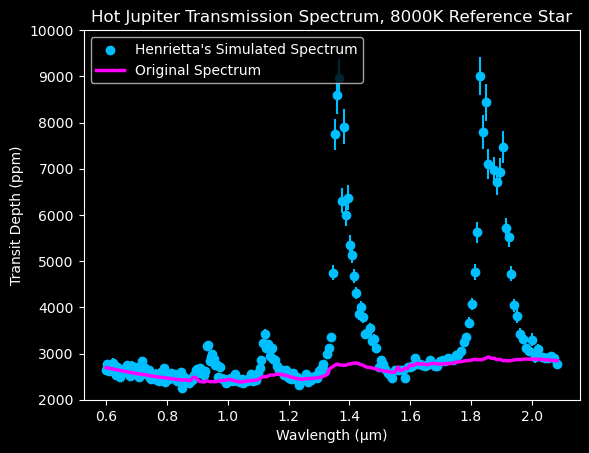

In [483]:
#model_hot_jupiter_abs2_5000
plt.scatter(conc_8000_wave, conc_8000, label="Henrietta's Simulated Spectrum", color="deepskyblue")
plt.errorbar(conc_8000_wave, conc_8000, conc_8000_std, ls="none", color="deepskyblue")

atm_signal = hot_jupiter_injected_transit
bulk_transit = (0.04644**2)*10**6

#bulk_transit_depth = np.sqrt(bulk_transit)
#print(bulk_transit_depth)
total_depth = (atm_signal+bulk_transit)
#print(atm_signal)

plt.plot(conc_8000_wave, total_depth, label="Original Spectrum", color="magenta", linewidth=2.5)
plt.title("Hot Jupiter Transmission Spectrum, 8000K Reference Star")
plt.xlabel("Wavlength (μm)")
plt.ylabel("Transit Depth (ppm)")

ax = plt.gca()
ax.set_ylim(2000, 10000)



plt.legend()

plt.savefig("8000KSpectrum")

In [474]:
#conc_8000